# Workbook 4
This week, we will complete the topic of interactions and learn about logistic regression. 

## Practice Interactions between a categorical and numeric variables.
* Q1: Open the NHANES2 data (https://www.stata-press.com/data/r17/nhanes2.dta).
* Q2: Run a regression with body mass index (bmi) as the outcome variables and with the following independent variables: rural, female, age, and an interaction between age and female. Write out the two equations with the estimated beta coefficients from the regression output. For example, female=0; female=1.
* Q3: What is the minimum, and maximum of age?
* Q4: Based on the min and max, decide a interval to use for the margins command. Use the margins command to make a graph comparing the interactions. Plot the margins results.
* Q5: Write a sentence summarizing the results of the interaction.

<i>answers are at the bottom of this workbook</i>

## Interactions between two numeric variables

Let's say, we want to fit a model predicting bmi across independent variables age, vitamin c, gender, and region.
    
<b>Additive model:</b>

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(vitaminc_i)+\beta_3*(female_i)+\beta_4*(mw_i)+\beta_5*(s_i)+\beta_6*(w_i)$

Let's say we think the effect of vitamin c intake changes the relationship between age to bmi

<b>Interaction model:</b>

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(vitaminc_i)+\beta_3*(age_ixvitaminc_i)+\beta_4*(female_i)+\beta_5*(mw_i)+\beta_6*(s_i)+\beta_7*(w_i)$

In [1]:
*Make a week 4 folder in your SOC 211 folder
*Set-up working directory to your week 4 folder
cd "C:\Users\acade\Documents\teaching\SOC 211 spring 2023\week4"

C:\Users\acade\Documents\teaching\SOC 211 spring 2023\week4


In [2]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear
summ vitaminc, detail
codebook vitaminc




                   Serum vitamin C (mg/dL)
-------------------------------------------------------------
      Percentiles      Smallest
 1%           .2             .1
 5%           .3             .1
10%           .3             .1       Obs               9,973
25%           .6             .1       Sum of wgt.       9,973

50%            1                      Mean           1.034814
                        Largest       Std. dev.      .5813791
75%          1.4            8.3
90%          1.7            9.4       Variance       .3380017
95%          1.9           13.9       Skewness       4.539869
99%          2.4           18.1       Kurtosis       108.2617


--------------------------------------------------------------------------------
vitaminc                                                 Serum vitamin C (mg/dL)
--------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [.1,18.1]         

In [3]:
regress bmi age vitaminc i.female i.region


      Source |       SS           df       MS      Number of obs   =     9,973
-------------+----------------------------------   F(6, 9966)      =     68.34
       Model |  9515.65877         6  1585.94313   Prob > F        =    0.0000
    Residual |  231262.471     9,966  23.2051446   R-squared       =    0.0395
-------------+----------------------------------   Adj R-squared   =    0.0389
       Total |   240778.13     9,972  24.1454201   Root MSE        =    4.8172

------------------------------------------------------------------------------
         bmi | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   .0524663   .0028167    18.63   0.000     .0469449    .0579877
    vitaminc |  -.8312809   .0862732    -9.64   0.000    -1.000394   -.6621679
             |
      female |
     Female  |   .1901829   .0983902     1.93   0.053    -.0026818    .3830475
             |
     

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(vitaminc_i)+\beta_3*(female_i)+\beta_4*(mw_i)+\beta_5*(s_i)+\beta_6*(w_i)$

<center>$(bmi_i)=23.90+.05*(age_i)+(-.83)*(vitaminc_i)+.19*(female_i)+(-.08)*(mw_i)+(-.20)*(s_i)+(-.15)*(w_i)$

In [4]:
regress bmi c.age##c.vitaminc i.female i.region


      Source |       SS           df       MS      Number of obs   =     9,973
-------------+----------------------------------   F(7, 9965)      =     63.61
       Model |  10298.9223         7  1471.27461   Prob > F        =    0.0000
    Residual |  230479.207     9,965  23.1288718   R-squared       =    0.0428
-------------+----------------------------------   Adj R-squared   =    0.0421
       Total |   240778.13     9,972  24.1454201   Root MSE        =    4.8092

------------------------------------------------------------------------------
         bmi | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   .0220407   .0059366     3.71   0.000     .0104038    .0336777
    vitaminc |  -2.331426   .2717928    -8.58   0.000    -2.864194   -1.798657
             |
       c.age#|
  c.vitaminc |    .029107   .0050017     5.82   0.000     .0193026    .0389115
             |
     

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(vitaminc_i)+\beta_3*(age_ixvitaminc_i)+\beta_4*(female_i)+\beta_5*(mw_i)+\beta_6*(s_i)+\beta_7*(w_i)$

<center>$(bmi_i)=25.46+.02*(age_i)+(-2.33)*(vitaminc_i)+.03*(age_ixvitaminc_i)+.19*(female_i)+(-.09)*(mw_i)+(-.21)*(s_i)+(-.16)*(w_i)$

The interaction is positive generally telling us as vitamin c intake increases and age increase, there is a generally an increase to bmi.

In [5]:
regress, coeflegend


      Source |       SS           df       MS      Number of obs   =     9,973
-------------+----------------------------------   F(7, 9965)      =     63.61
       Model |  10298.9223         7  1471.27461   Prob > F        =    0.0000
    Residual |  230479.207     9,965  23.1288718   R-squared       =    0.0428
-------------+----------------------------------   Adj R-squared   =    0.0421
       Total |   240778.13     9,972  24.1454201   Root MSE        =    4.8092

------------------------------------------------------------------------------
         bmi | Coefficient  Legend
-------------+----------------------------------------------------------------
         age |   .0220407  _b[age]
    vitaminc |  -2.331426  _b[vitaminc]
             |
       c.age#|
  c.vitaminc |    .029107  _b[c.age#c.vitaminc]
             |
      female |
     Female  |   .1858965  _b[1.female]
             |
      region |
         MW  |  -.0936871  _b[2.region]
          S  |  -.2137082  _b[3.region

In [6]:
*This calculates the predicted values with specific age and vitamin c values AND other variables are at average.
margins , at(age=(20(25)70) vitaminc=(.2(.6)2)) atmeans vsquish


Adjusted predictions                                     Number of obs = 9,973
Model VCE: OLS

Expression: Linear prediction, predict()
1._at:  age      =       20
        vitaminc =       .2
        0.female = .4748822 (mean)
        1.female = .5251178 (mean)
        1.region =  .204452 (mean)
        2.region = .2717337 (mean)
        3.region = .2690264 (mean)
        4.region = .2547879 (mean)
2._at:  age      =       20
        vitaminc =       .8
        0.female = .4748822 (mean)
        1.female = .5251178 (mean)
        1.region =  .204452 (mean)
        2.region = .2717337 (mean)
        3.region = .2690264 (mean)
        4.region = .2547879 (mean)
3._at:  age      =       20
        vitaminc =      1.4
        0.female = .4748822 (mean)
        1.female = .5251178 (mean)
        1.region =  .204452 (mean)
        2.region = .2717337 (mean)
        3.region = .2690264 (mean)
        4.region = .2547879 (mean)
4._at:  age      =       20
        vitaminc =        2
        0

In [7]:
marginsplot, x(age)
graph export "vitaminc_age.png", replace width(3400)



Variables that uniquely identify margins: age vitaminc

file C:/Users/acade/.stata_kernel_cache/graph0.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph0.pdf saved as PDF format

(file vitaminc_age.png not found)
file vitaminc_age.png saved as PNG format


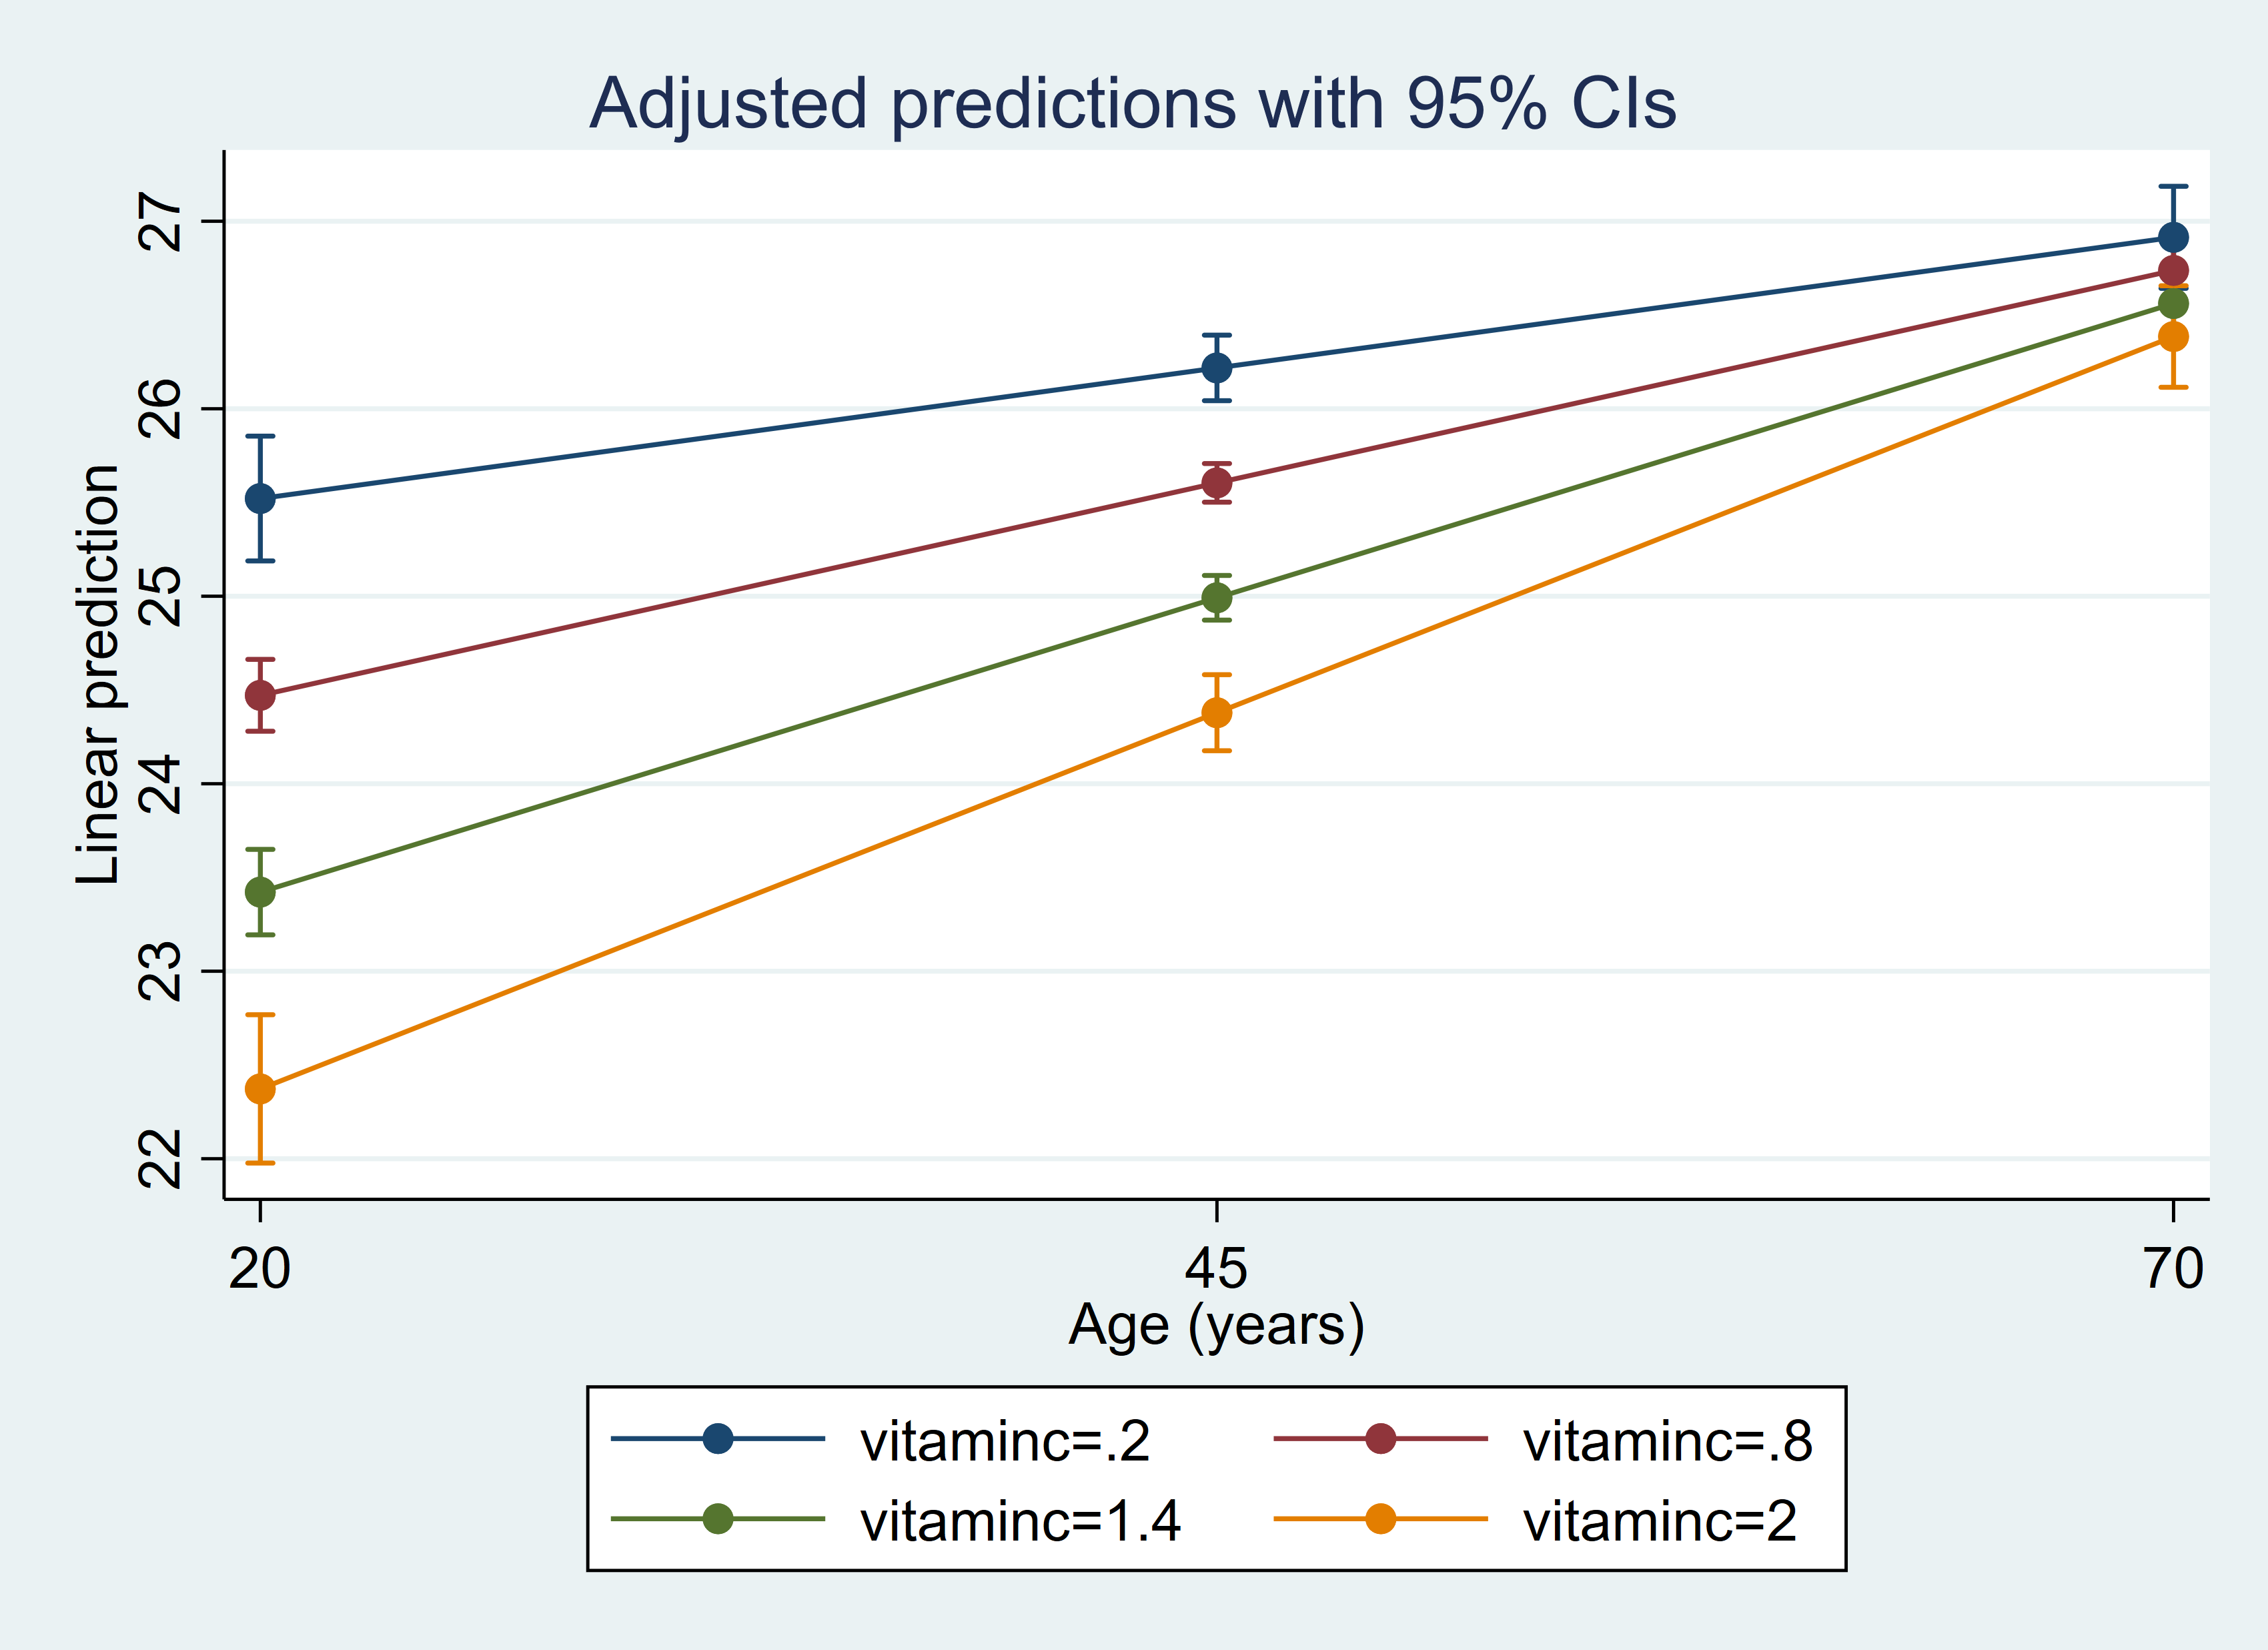

We can see the effect of age on bmi is strongest as vitamin c intake increases. Fro example, we see the slope between age and bmi gets steeper as vitamin c intake increases.

In [8]:
*I got many questions about width in the graph export command, it is just the number of pixels by width.
*Let's make a smaller image
marginsplot, x(age)
graph export "vitaminc_age_small.png", replace width(300)



Variables that uniquely identify margins: age vitaminc

file C:/Users/acade/.stata_kernel_cache/graph1.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph1.pdf saved as PDF format

(file vitaminc_age_small.png not found)
file vitaminc_age_small.png saved as PNG format


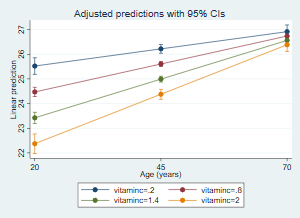

## Practice Interactions between two numeric variables.
* Q1: Open the NHANES2 data (https://www.stata-press.com/data/r17/nhanes2.dta). Use the "codebook" command for tcresult.
* Q2: Run a regression with body mass index (bmi) as the outcome variables and with the following independent variables: tcresult, female, and age. Write out an equation with the estimated beta coefficients from the regression output. (SKIP)
* Q3: Run a regression with body mass index (bmi) as the outcome variables and with the following independent variables: tcresult, female, age, and an interaction between age and tcresult. 
* Q3: What is the minimum, and maximum of age and tcresult?
* Q4: Based on the min and max, decide intervals to use for the margins command. Use the margins command to make a graph comparing the interactions. Plot the margins results.
* Q5: Write a sentence summarizing the results of the interaction.

<i>answers are at the bottom of the workbook</i>

# Logistic regression
When you have a dependent variable that is categorical, you have to some form of logistic regression. Right now, we will focus on logist (binary dependent variable).

In [31]:
use "http://www.stata-press.com/data/agis6/divorce.dta", clear
list divorce positives




     +--------------------+
     | divorce   positi~s |
     |--------------------|
  1. |       0         10 |
  2. |       0          8 |
  3. |       0          9 |
  4. |       0          7 |
  5. |       0          8 |
     |--------------------|
  6. |       0          5 |
  7. |       0          9 |
  8. |       0          6 |
  9. |       0          8 |
 10. |       0          7 |
     |--------------------|
 11. |       1          1 |
 12. |       1          1 |
 13. |       1          3 |
 14. |       1          1 |
 15. |       1          4 |
     |--------------------|
 16. |       1          5 |
 17. |       1          6 |
 18. |       1          3 |
 19. |       1          2 |
 20. |       1          0 |
     +--------------------+


In [32]:
desc


Contains data from http://www.stata-press.com/data/agis6/divorce.dta
 Observations:            20                  
    Variables:             2                  9 Feb 2016 12:09
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
divorce         byte    %8.0g                 Marriage ends in divorce within 5
                                                years
positives       byte    %8.0g                 Rating on positive feedback before
                                                marriage
--------------------------------------------------------------------------------
Sorted by: 


### Here, we are trying to assess if there is a relationship between rating of postive feedback and divorce. Here, rating of positive feedback is independent variable and divorce is dependent variable. Let's look at the distribution of the points with a scatter plot.

In [22]:
scatter divorce positives
graph export "div_obs.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph4.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph4.pdf saved as PDF format

(file div_obs.png not found)
file div_obs.png saved as PNG format


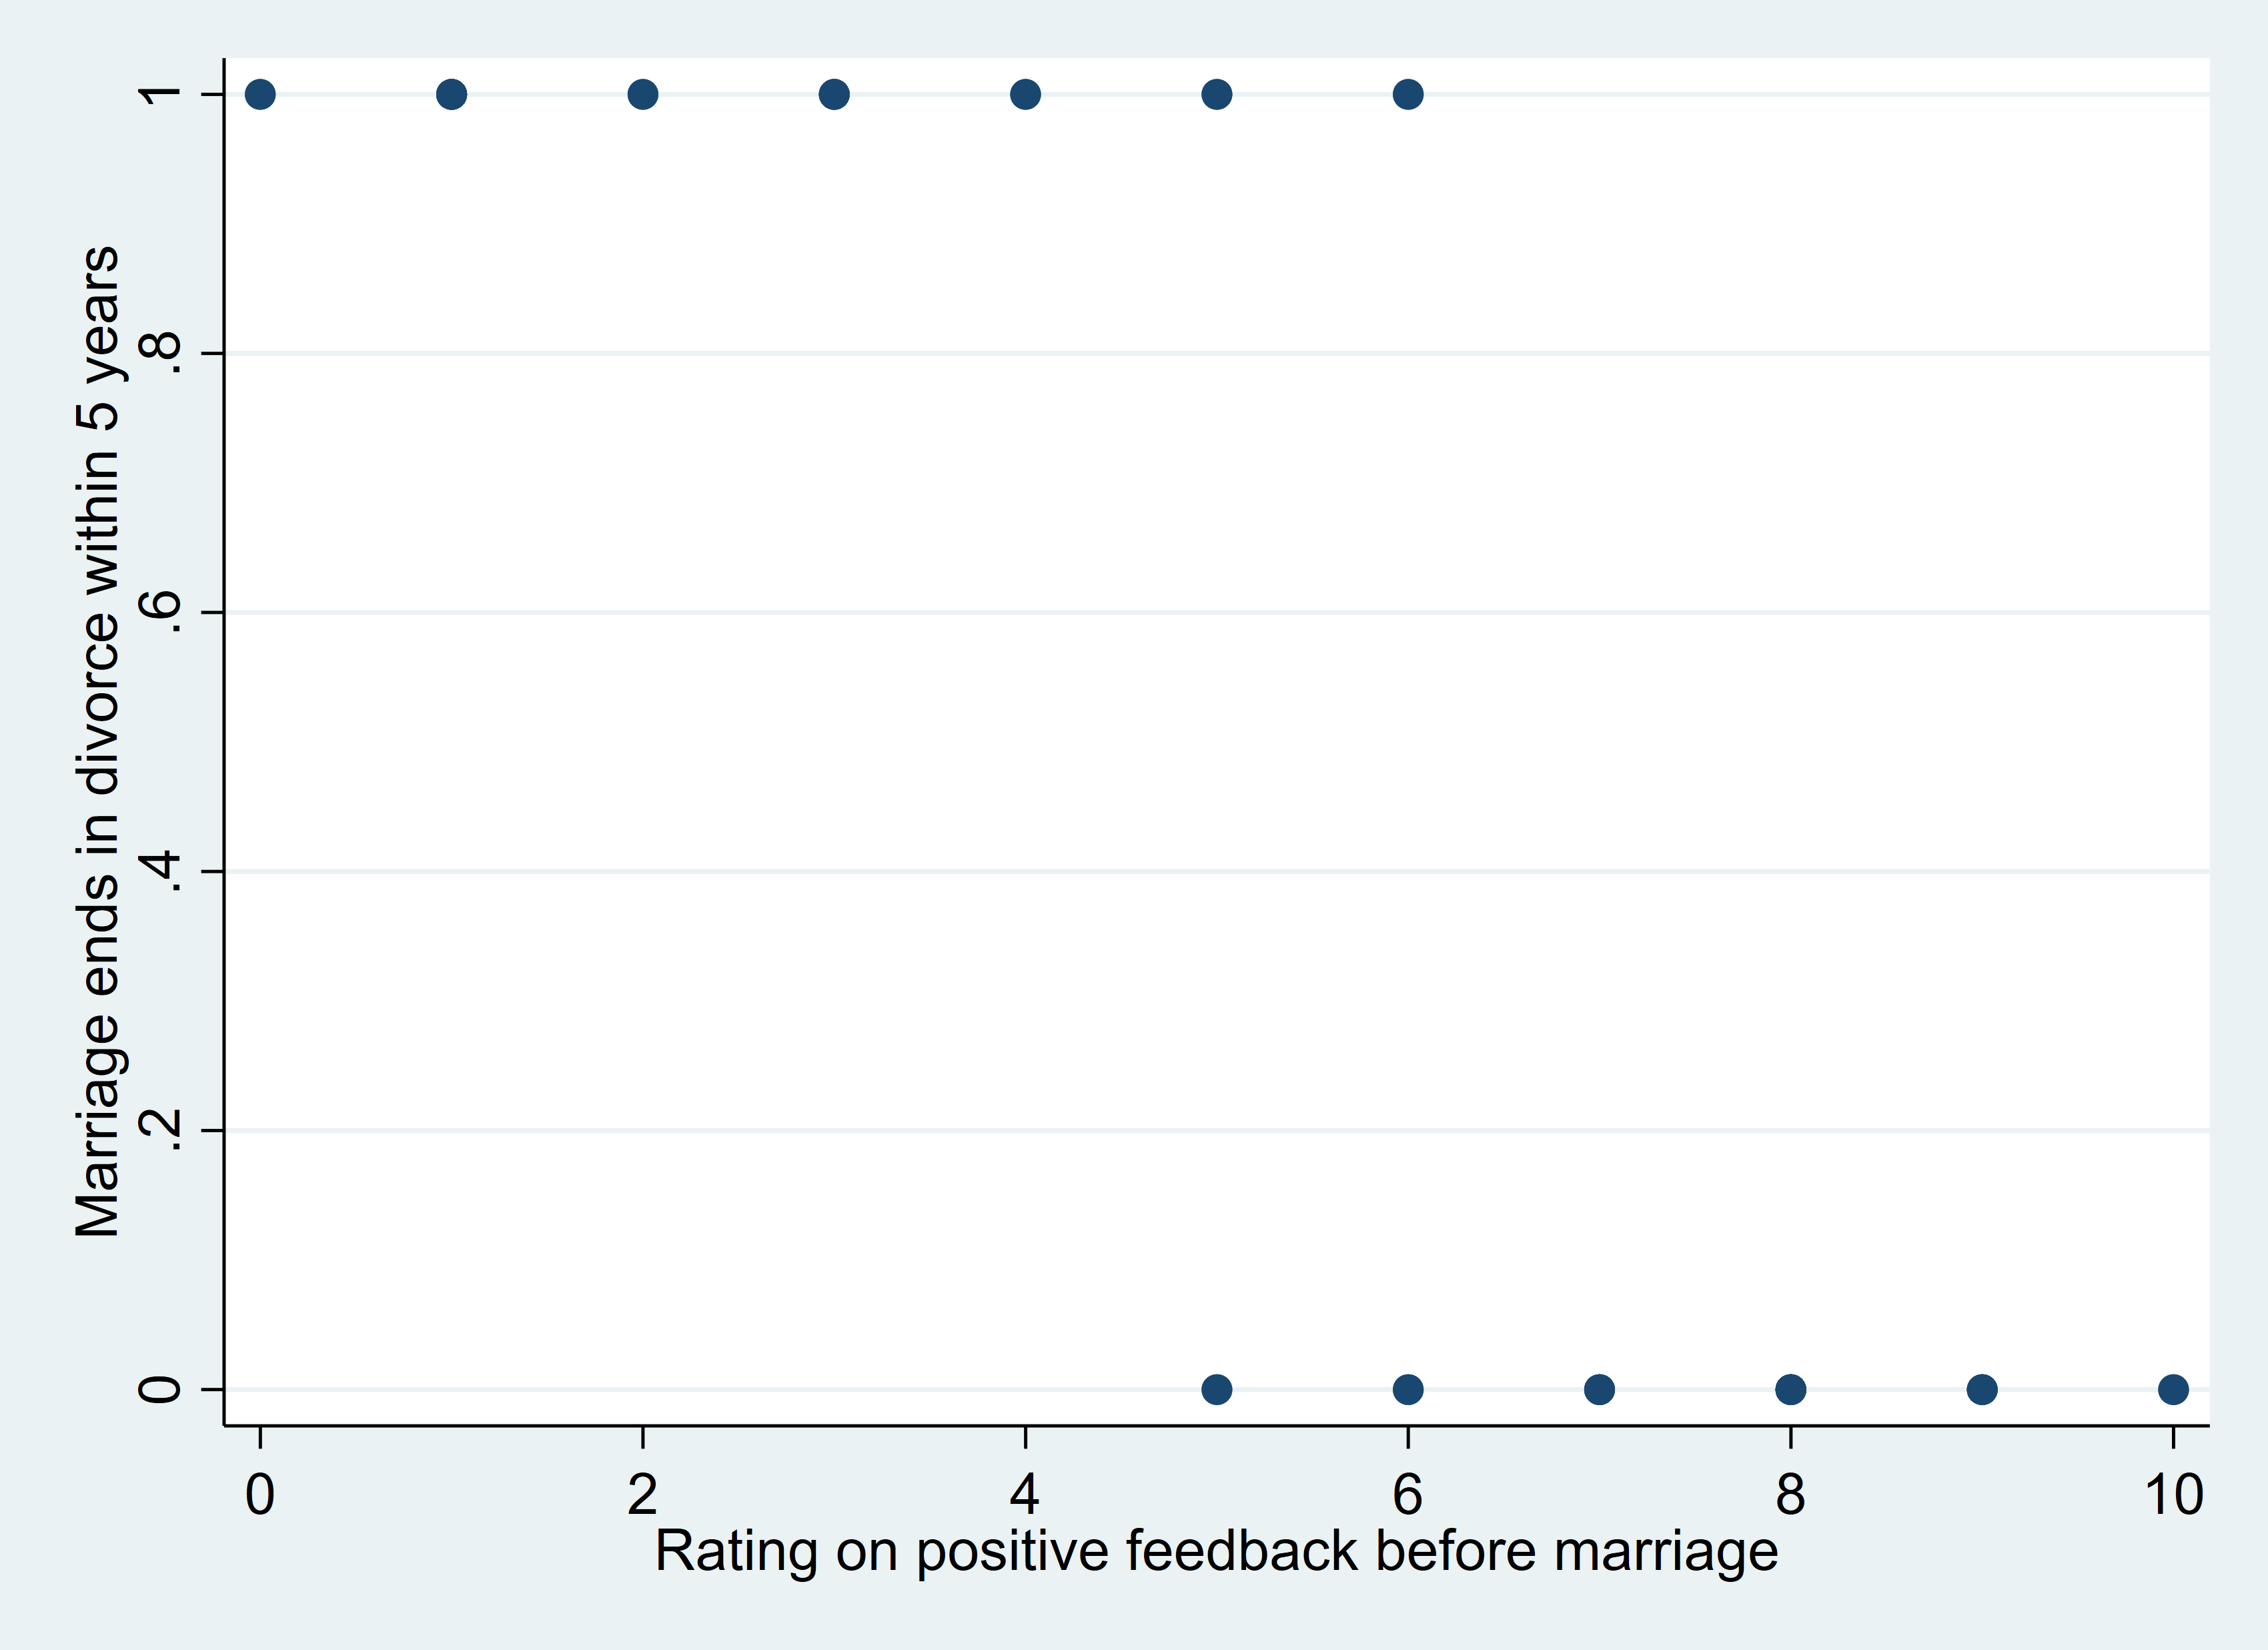

### We see a general trend where having higher positive feedback is less likely to have divorce. However, this relationship is not linear. In logistic regression, we use "logit" to transform to a linear relationship.

In [23]:
logit divorce positives


Iteration 0:   log likelihood = -13.862944  
Iteration 1:   log likelihood = -3.5768067  
Iteration 2:   log likelihood = -3.4221578  
Iteration 3:   log likelihood = -3.4189568  
Iteration 4:   log likelihood = -3.4189473  
Iteration 5:   log likelihood = -3.4189473  

Logistic regression                                     Number of obs =     20
                                                        LR chi2(1)    =  20.89
                                                        Prob > chi2   = 0.0000
Log likelihood = -3.4189473                             Pseudo R2     = 0.7534

------------------------------------------------------------------------------
     divorce | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
   positives |  -1.816682    1.00464    -1.81   0.071     -3.78574    .1523768
       _cons |   9.921966   5.684654     1.75   0.081    -1.219751    21.06368
----------------

In [24]:
predict pred_prob

(option pr assumed; Pr(divorce))


In [25]:
scatter pred_prob positives
graph export "div_obs_pred_prob.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph5.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph5.pdf saved as PDF format

(file div_obs_pred_prob.png not found)
file div_obs_pred_prob.png saved as PNG format


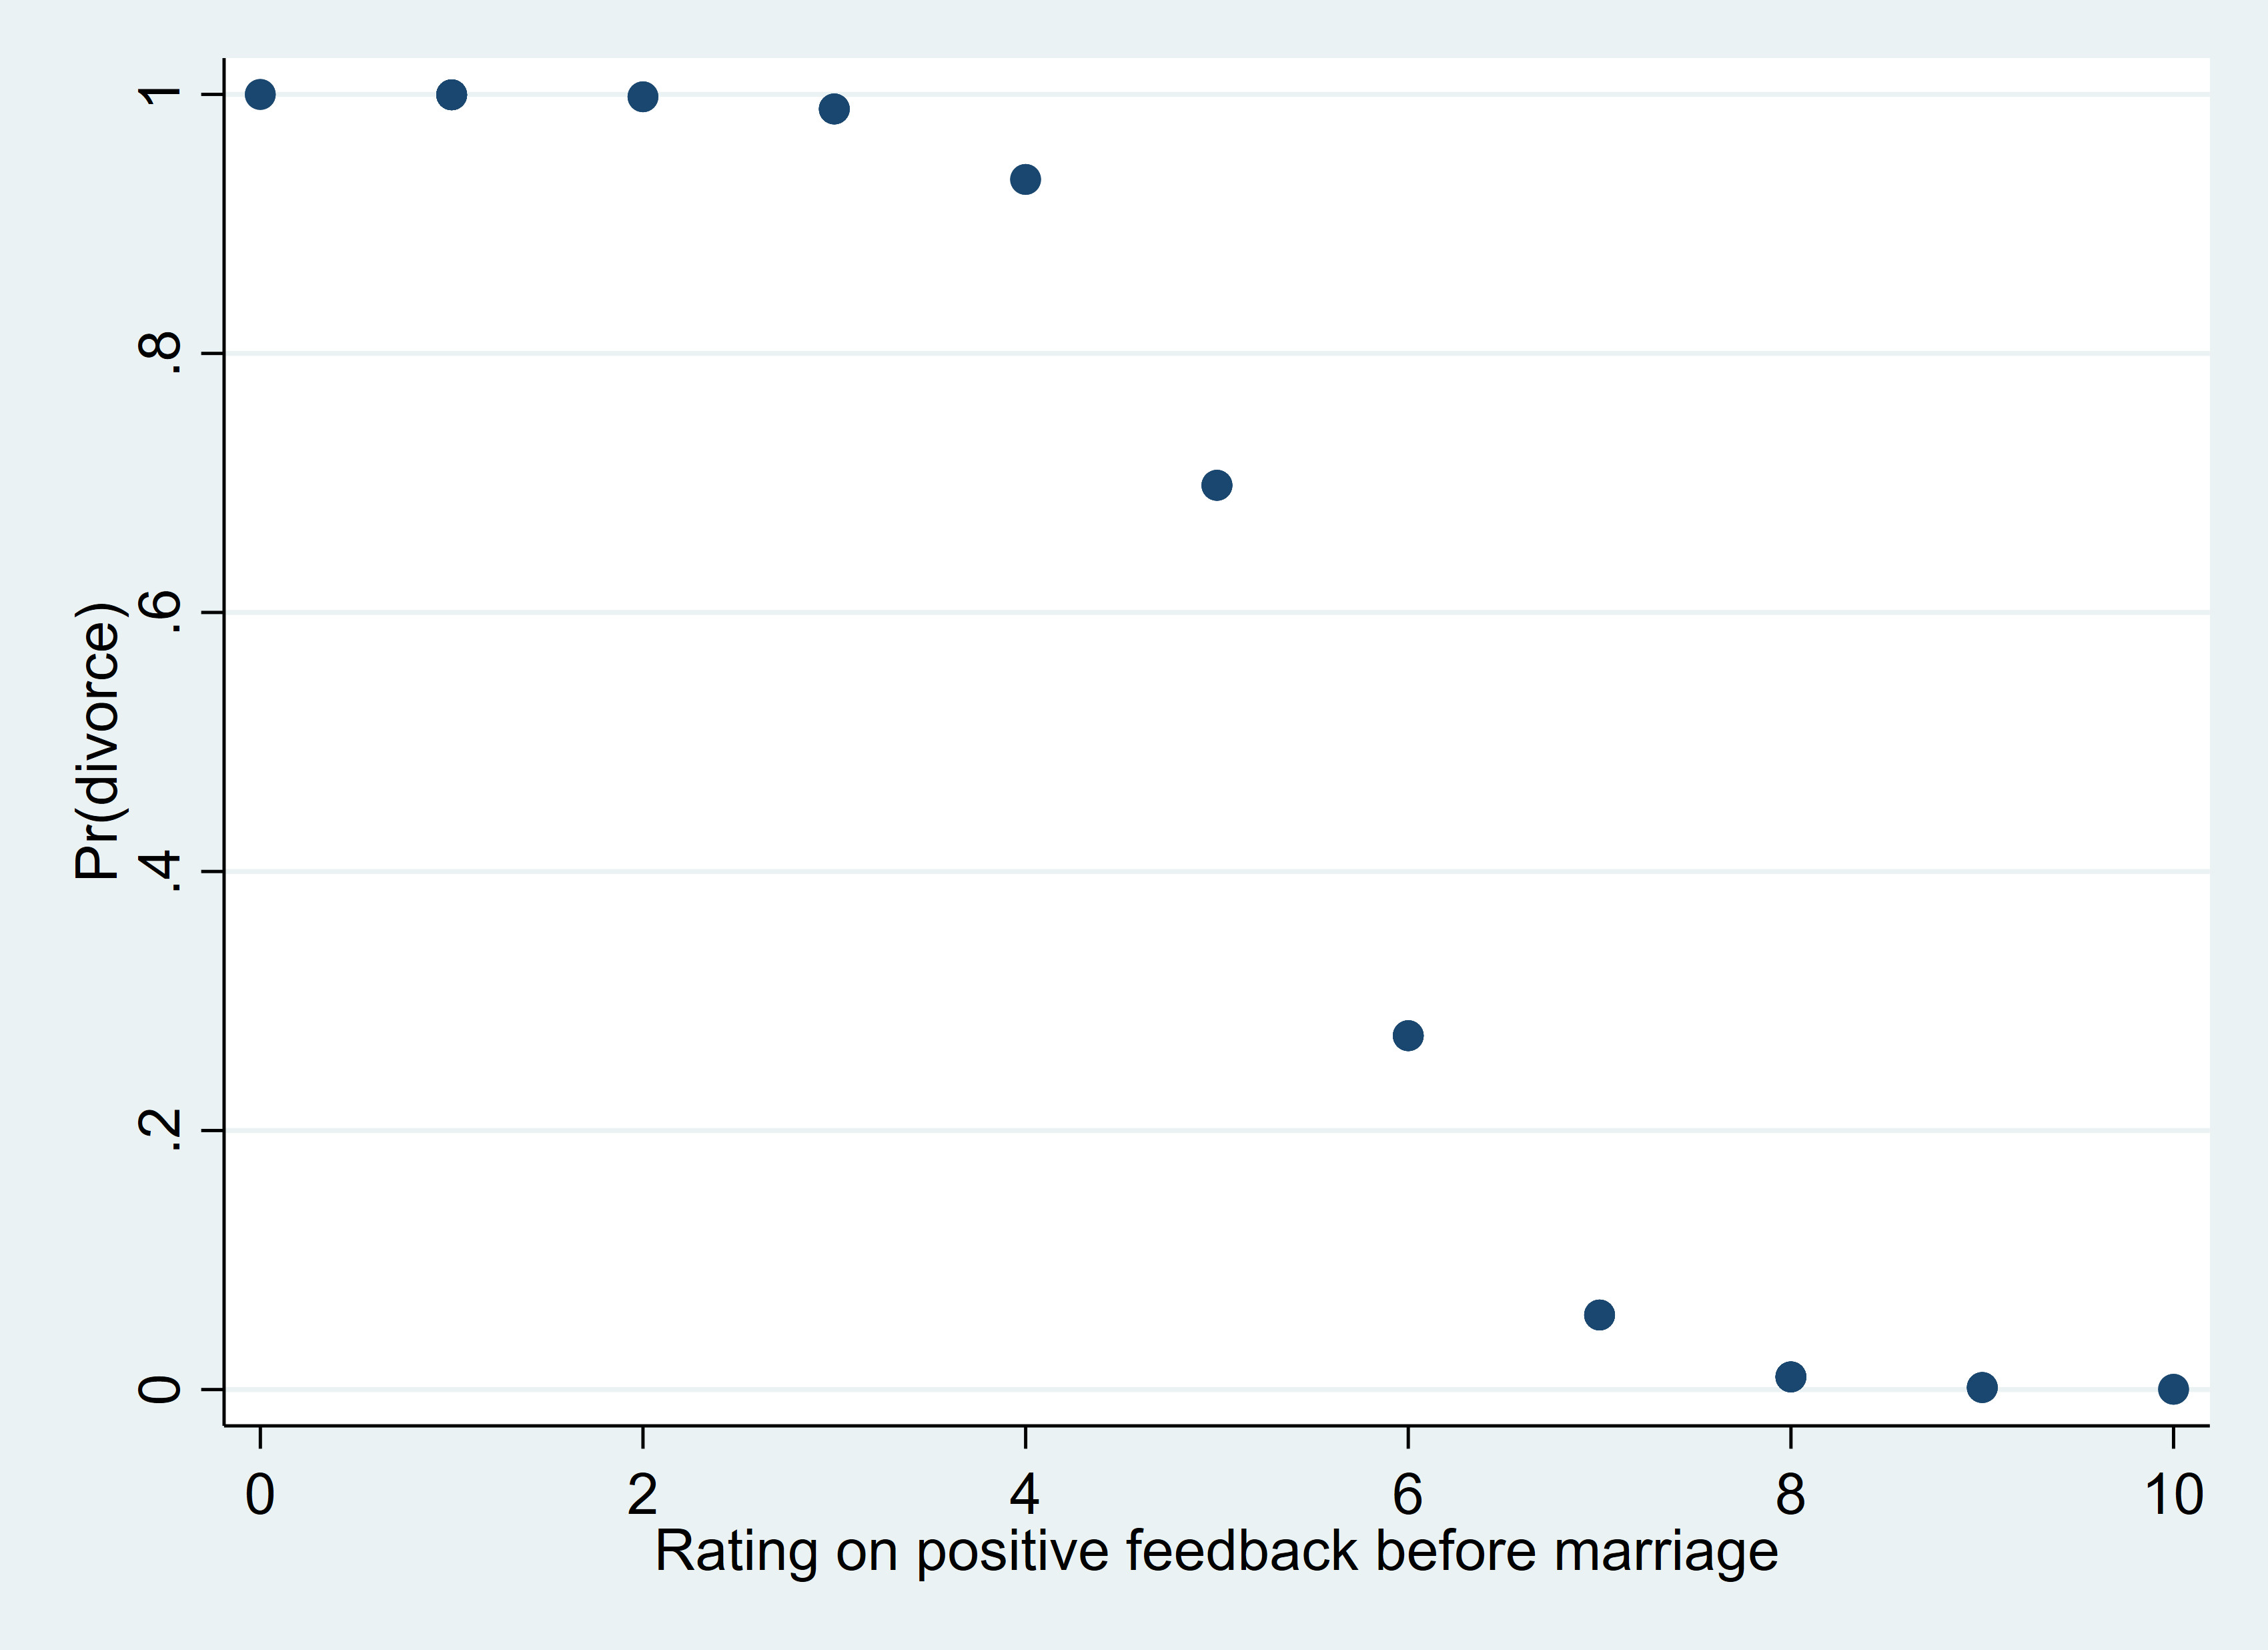

See how the predicted probabilities for logit positive feedback has a S-curve to divorce?

In [34]:
quietly logit divorce positives
logit , coeflegend




Logistic regression                                     Number of obs =     20
                                                        LR chi2(1)    =  20.89
                                                        Prob > chi2   = 0.0000
Log likelihood = -3.4189473                             Pseudo R2     = 0.7534

------------------------------------------------------------------------------
     divorce | Coefficient  Legend
-------------+----------------------------------------------------------------
   positives |  -1.816682  _b[positives]
       _cons |   9.921966  _b[_cons]
------------------------------------------------------------------------------


In [35]:
predict yhat_linear, xb
*this generate below gives us the same output as above
gen logit_predict_linear=_b[positives]*positives+ _b[_cons]

In [29]:
scatter logit_predict_linear positives
graph export "div_obs_logit_linear.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph6.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph6.pdf saved as PDF format

(file div_obs_logit_linear.png not found)
file div_obs_logit_linear.png saved as PNG format


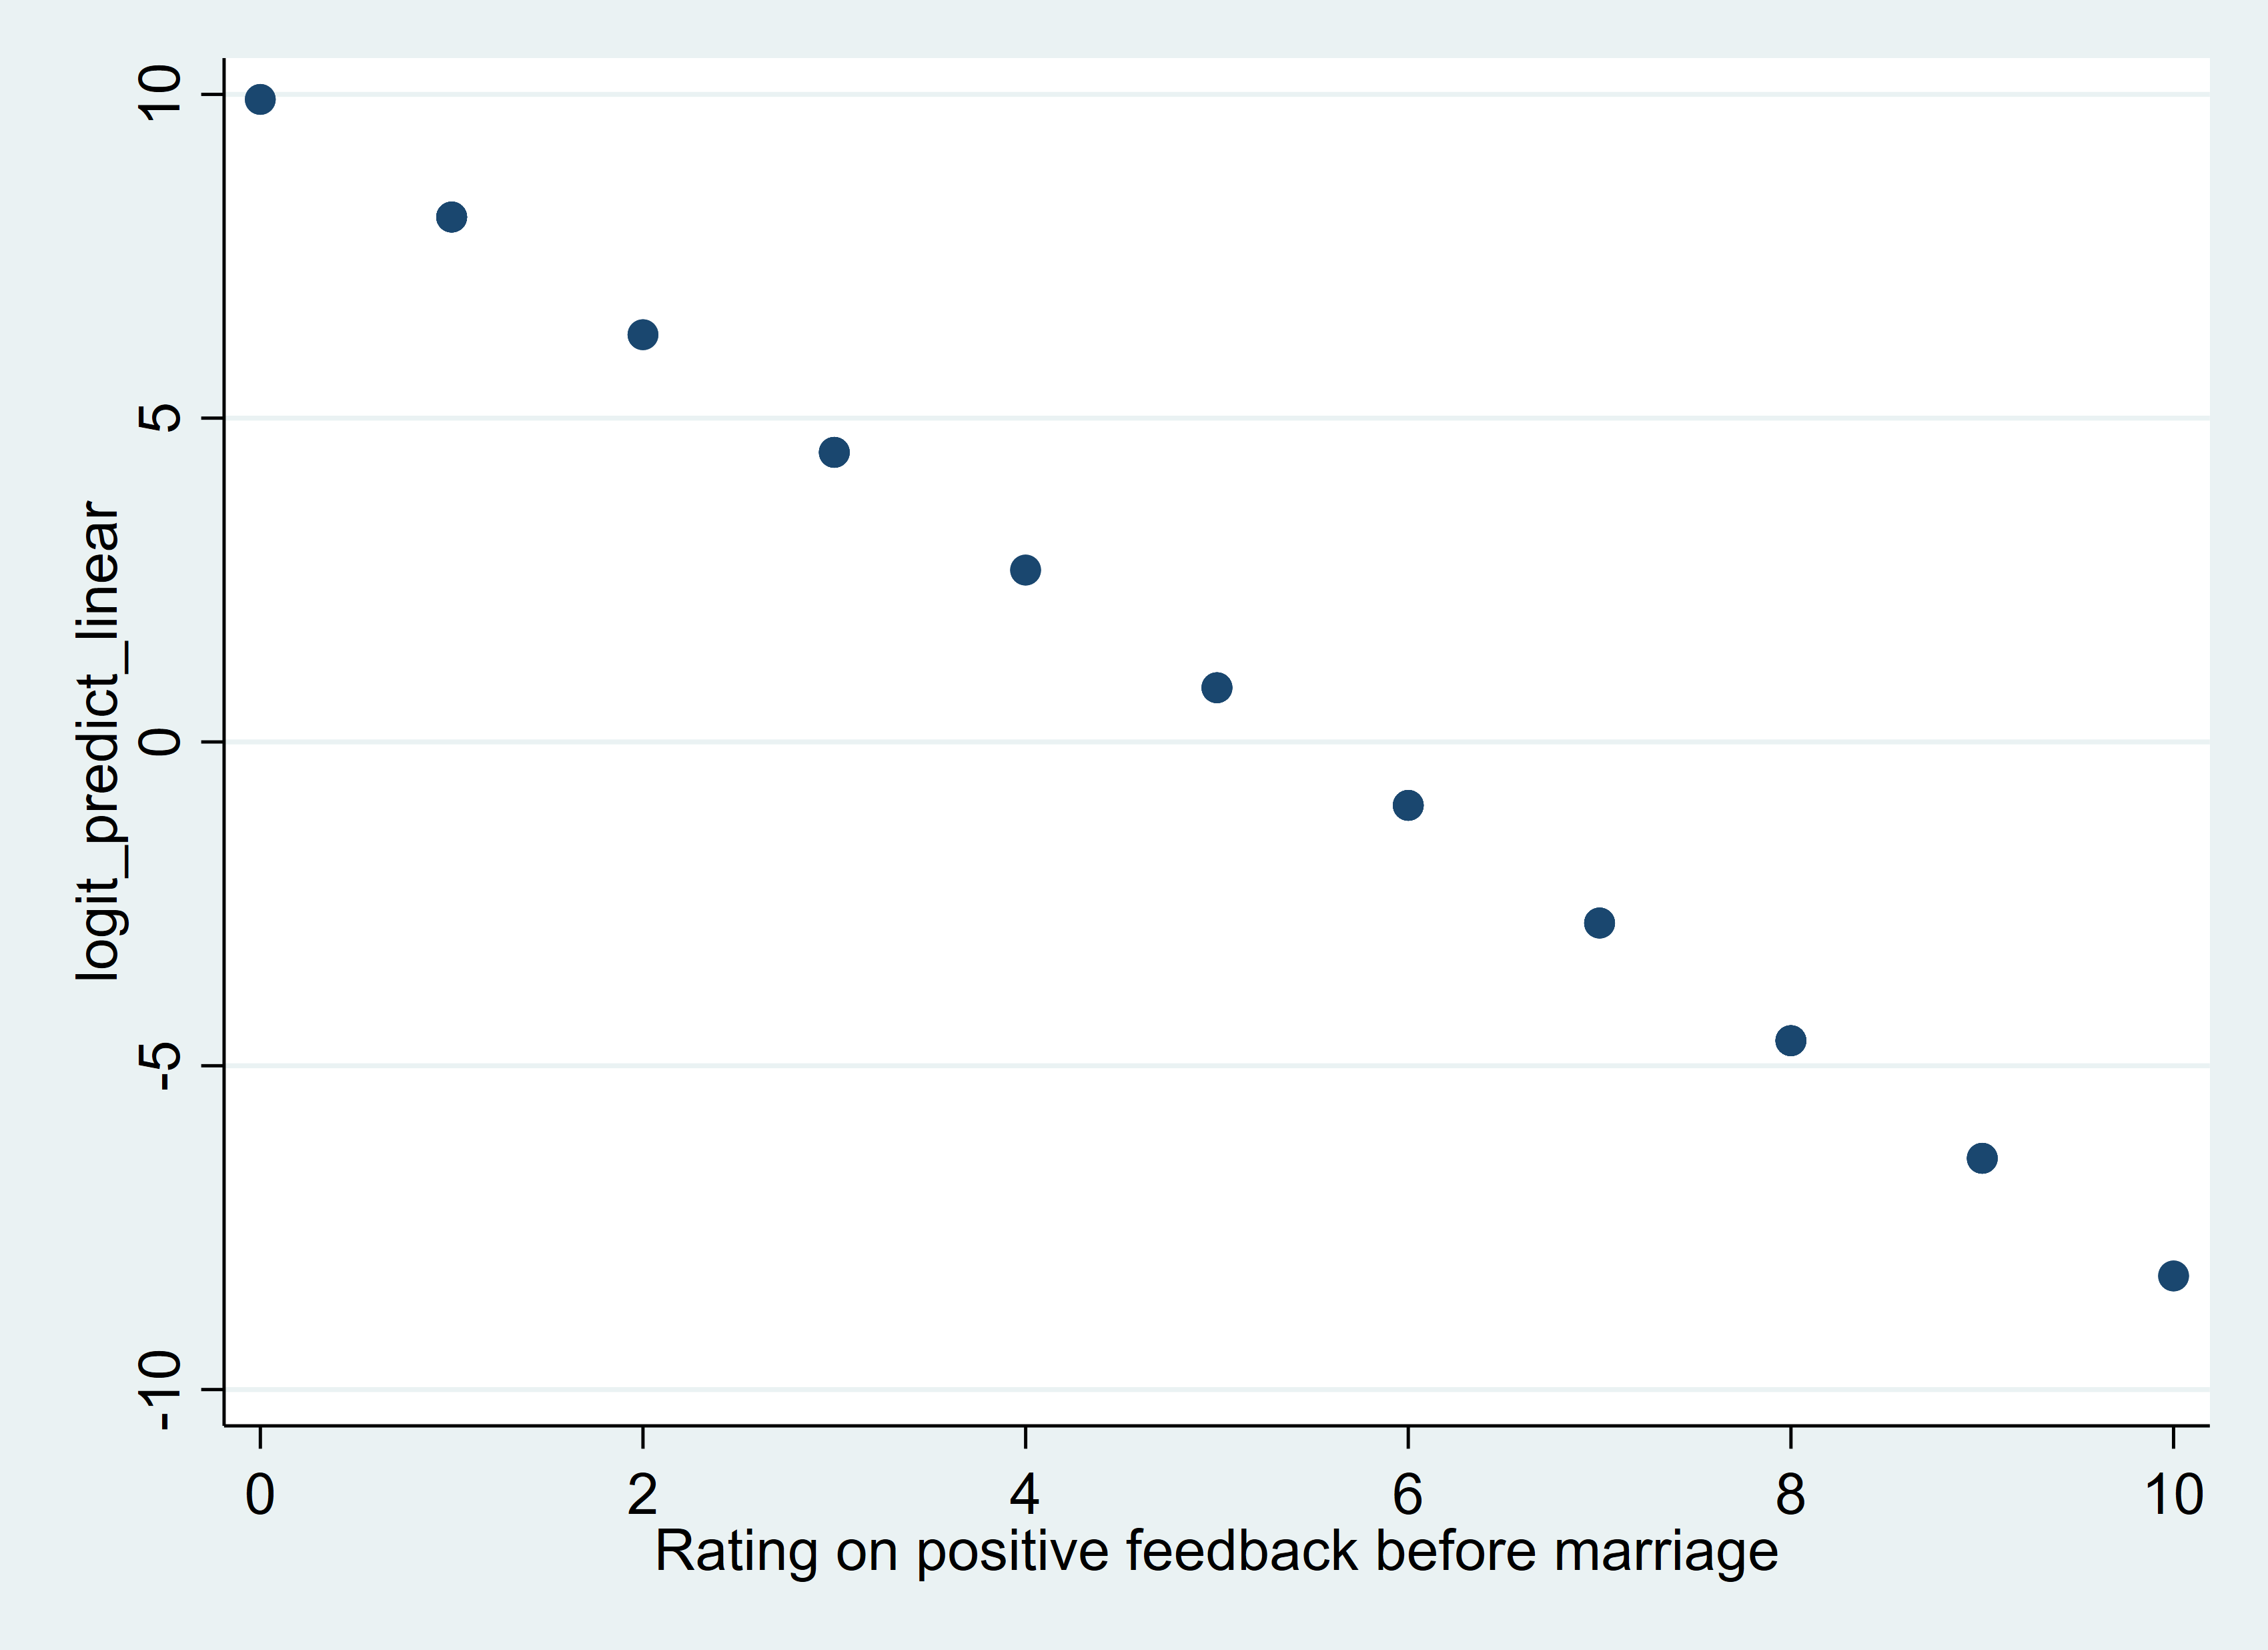

In [37]:
scatter yhat_linear positives
graph export "div_obs_logit_linear_yhat.png", replace width(3400)



file C:/Users/acade/.stata_kernel_cache/graph7.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph7.pdf saved as PDF format

(file div_obs_logit_linear_yhat.png not found)
file div_obs_logit_linear_yhat.png saved as PNG format


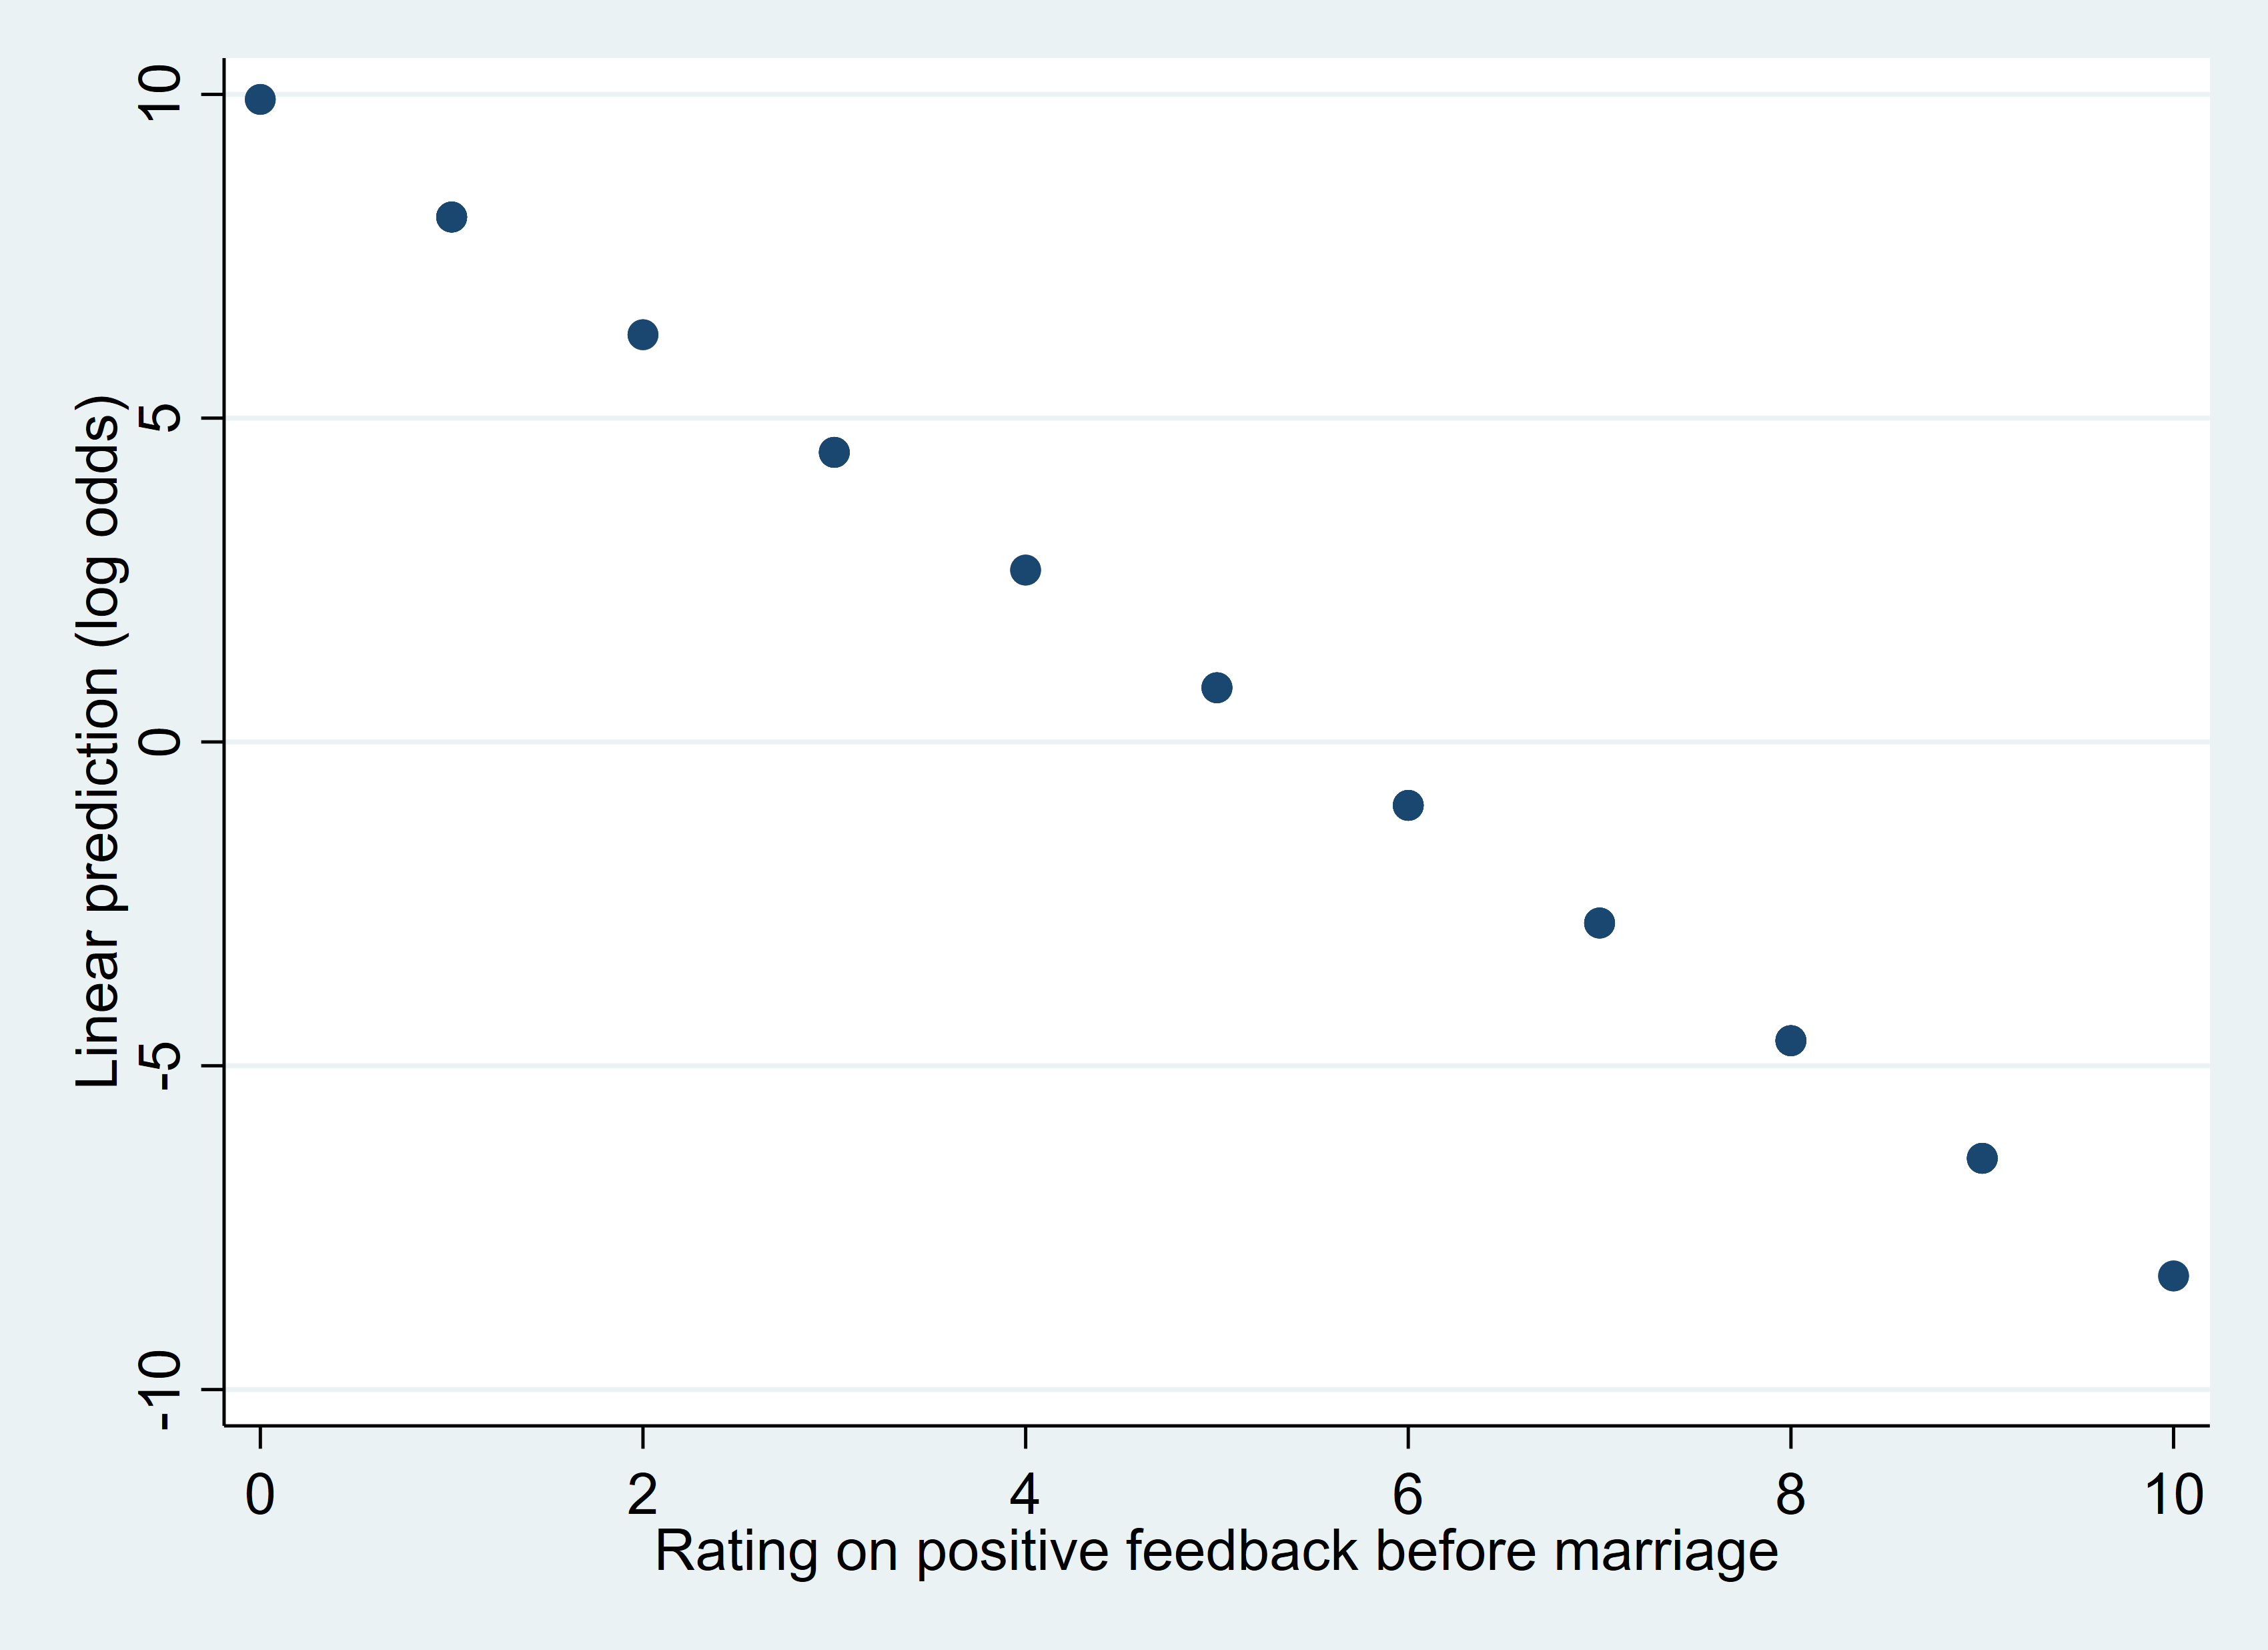

Here, we see the logit regression estimates are linear. This means that the logistic regression here, it is a linear relationship (unless we put quadratic terms in).

The data is not linear, so we use logit and that transforms the data into linear model.

# Categorical variables as dependent variables
We use logistic regression to estimate a regression model with a categorical variable as the dependent variable. Logistic regression estimates the model using the logit. And the logit is the natural log transformation of odds ratio.

In [38]:
use "http://www.stata-press.com/data/agis6/environ", clear
tab environ libcand, row




+----------------+
| Key            |
|----------------|
|   frequency    |
| row percentage |
+----------------+

Environmen |
       tal |    support liberal
concern: 1 |  candidate: 1 yes, 0
   high, 0 |          no
       low |         0          1 |     Total
-----------+----------------------+----------
         0 |         6          4 |        10 
           |     60.00      40.00 |    100.00 
-----------+----------------------+----------
         1 |         3          7 |        10 
           |     30.00      70.00 |    100.00 
-----------+----------------------+----------
     Total |         9         11 |        20 
           |     45.00      55.00 |    100.00 


<b> Probabilities</b>
* The probability of liberal candidate is 11/20 (.55)
* The probaility of a liberal candidate having low env concern is 4/10 (.4)
* The probaility of a liberal candidate having high env concern is 7/10 (.7)
* Probabilities range from 0 to 1.

<b> Odds</b>
* The ODDS of liberal candidate is 11/9 (1.22). Odds(liberal)=Odds(liberal)/Odds(not liberal)=1.22
* The ODDS of liberal candidate and having low env concern is 4/6 (.67). Odds(liberal & low env concern)/Odds(not liberal & low env concern)=4/6.
* The ODDS of both liberal candidate and having high env concern is 7/3 (2.33). Odds(liberal & high env concern)/Odds(not liberal & high env concern)=7/3
* Odds range from 0 to infinity where below 1 means lowers odds and greater than 1 means higher odds.

<b> Odd ratios</b>
* The ODDS RATIO of liberal candidate of having environmental concern is 3.48 (2.33/.67). The odds of a liberal candidate having high env concern is 3.48 times greater than a liberal candidate having low env concern.
* Odds ratio ranges from 0 to infinity for things more likely to happens and between 0 to 1 for things less likely to happen.
* We can natural log odd ratio to make them normally distributed.

Using logit, allows us to estimate a linear regression of the odds ratio:

<center>$logit=ln(odds(p)/odds(q))$
    
<center>$logit=ln(odds ratio)$

Let's look at some of math behind the logit:

Previously, we used the following equation for regression model with contiunous outcomes:

<center>$y=a+bx$
    
Let's plug in logit (the natural log of the odds ratios (OR)) for our variables (independent and dependent variables):
<center>$logit_y=a+b*logit_x$
    
We can get back to the just the odds ratios by exponent-ing both sidestaking:
<center>$exp^{ln(OR_y)}=exp^{ln(a+b*OR_x)}$
    
This gets us back to odds ratios:
<center>$(OR_y)=(a+b*OR_x)$
    
So, when getting your coefficients estimates, they must be transformed back into odds ratios (by exponentiated).

<b>By using logits, we are basically modeling a similar regression as compared to contiunous outcomes. So, you can have interaction terms in the model. You can even have quadratic or other variable transformations. Just make sure it makes sense in terms of theory and for the data.

### Interaction example with logistic regression

In this example, we are interested in predicting one's likelihood of drinking in the last 30 days. This variable is a categorical 0/1 variable. We will be using the following independent variables: age, having peers drinking, having dinners with family, and gender.

<b>Additive model:</b>

<center>$Pr(drink_i=1)=F(\beta_0+\beta_1*(age_i)+\beta_2*(pdrink_i)+\beta_3*(famdinner_i)+\beta_4*(male_i))$
    
<center>$ where $
    <center> $ F(z) = e^{z} / (1+ e^{z}) $

In [40]:
use "http://www.stata-press.com/data/agis6/nlsy97_chapter11.dta", clear
codebook drank30 age97 pdrink97 dinner97 male


(National Survey of Youth, 1997, selected variables from first wave)


--------------------------------------------------------------------------------
drank30                                                              (unlabeled)
--------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [0,1]                         Units: 1
         Unique values: 2                         Missing .: 0/8,984
       Unique mv codes: 3                        Missing .*: 5,165/8,984

            Tabulation: Freq.  Value
                        2,094  0
                        1,725  1
                            3  .a
                           15  .b
                        5,147  .d

--------------------------------------------------------------------------------
age97                                                 age at interview date 1997
---------------------------------------------------------------------

In [41]:
summarize drank30 age97 pdrink97 dinner97 male


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
     drank30 |      3,819    .4516889    .4977257          0          1
       age97 |      8,984    14.35363    1.488145         12         18
    pdrink97 |      8,799    2.136152    1.246358          1          5
    dinner97 |      5,356     5.07823    2.273635          0          7
        male |      8,984    .5119101     .499886          0          1


In [42]:
*Using "logistic" command reports the estimates in ODDS ratios
logistic drank30 age97 pdrink97 dinner97 male


Logistic regression                                     Number of obs =  1,654
                                                        LR chi2(4)    =  78.01
                                                        Prob > chi2   = 0.0000
Log likelihood = -1061.0474                             Pseudo R2     = 0.0355

------------------------------------------------------------------------------
     drank30 | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       age97 |   1.169241   .0684191     2.67   0.008     1.042546    1.311332
    pdrink97 |   1.329275   .0598174     6.33   0.000     1.217056    1.451841
    dinner97 |    .942086   .0208682    -2.69   0.007     .9020603    .9838878
        male |   .9794922   .1046935    -0.19   0.846     .7943646    1.207764
       _cons |   .0524677   .0415938    -3.72   0.000     .0110944    .2481314
--------------------------------------------------

This reports the odds ratio.
Here, we see that as age, % of peers drinking increases, the odds of drinking increase. Furthermore, we see that as # of dinner with family increases, the odds of drinking decreases. Men have less odds to drink as compared to women.

In [43]:
*Using "logit" command reports the estimates in logits so you have transform them back!
logit drank30 age97 pdrink97 dinner97 male


Iteration 0:   log likelihood = -1100.0502  
Iteration 1:   log likelihood =  -1061.142  
Iteration 2:   log likelihood = -1061.0474  
Iteration 3:   log likelihood = -1061.0474  

Logistic regression                                     Number of obs =  1,654
                                                        LR chi2(4)    =  78.01
                                                        Prob > chi2   = 0.0000
Log likelihood = -1061.0474                             Pseudo R2     = 0.0355

------------------------------------------------------------------------------
     drank30 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       age97 |   .1563548   .0585158     2.67   0.008     .0416659    .2710437
    pdrink97 |   .2846336   .0450001     6.33   0.000     .1964351    .3728321
    dinner97 |  -.0596587    .022151    -2.69   0.007    -.1030739   -.0162434
        male |   -.020721  

This reports the logit. They are transformation of each other. 

<center>$exp_{logit}=(odds ratio)$

In [44]:
logit , coeflegend


Logistic regression                                     Number of obs =  1,654
                                                        LR chi2(4)    =  78.01
                                                        Prob > chi2   = 0.0000
Log likelihood = -1061.0474                             Pseudo R2     = 0.0355

------------------------------------------------------------------------------
     drank30 | Coefficient  Legend
-------------+----------------------------------------------------------------
       age97 |   .1563548  _b[age97]
    pdrink97 |   .2846336  _b[pdrink97]
    dinner97 |  -.0596587  _b[dinner97]
        male |   -.020721  _b[male]
       _cons |  -2.947557  _b[_cons]
------------------------------------------------------------------------------


In [45]:
di exp(_b[age97])

1.169241


## Generally, negative logit indicate below 1 odds ratios and positive indicate greater than 1 odds ratio.

Another thing to note: logistic regression uses maximum likelihood estimation. This is not OLS. This method calculates many iterations of the distributions to figure out its positioning and uses the one with maximum likelihood. 

In [74]:
logistic drank30 age97 pdrink97 dinner97 male


Logistic regression                                     Number of obs =  1,654
                                                        LR chi2(4)    =  78.01
                                                        Prob > chi2   = 0.0000
Log likelihood = -1061.0474                             Pseudo R2     = 0.0355

------------------------------------------------------------------------------
     drank30 | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       age97 |   1.169241   .0684191     2.67   0.008     1.042546    1.311332
    pdrink97 |   1.329275   .0598174     6.33   0.000     1.217056    1.451841
    dinner97 |    .942086   .0208682    -2.69   0.007     .9020603    .9838878
        male |   .9794922   .1046935    -0.19   0.846     .7943646    1.207764
       _cons |   .0524677   .0415938    -3.72   0.000     .0110944    .2481314
--------------------------------------------------

The odd ratios of drinking are multiplied by 1.17 for every one year increase to age. For odds ratio that are greater than 1, you can substract the value by one and interpret it as a percent. For example For every one year increase in age, there is a 17% increase in odds of drinking. 

The odd ratios of drinking for men are .97 as compared to women. For odds ratio less than 1, you can substract the value by one and interpret the value as a percent. For example the odds of drinking for men is 2% less as compared to women.

# Running interactions within a logistic regression model

Now, let's say we want to exchange gender for race.

<b>Additive model:</b>

<center>$Pr(drink_i=1)=F(\beta_0+\beta_1*(age_i)+\beta_2*(pdrink_i)+\beta_3*(famdinner_i)+\beta_4*(male_i))$
    
<center>$ where $
    <center> $ F(z) = e^{z} / (1+ e^{z}) $

<b>Interaction model:</b>

<center>$Pr(drink_i=1)=F(\beta_0+\beta_1*(age_i)+\beta_2*(pdrink_i)+\beta_3*(famdinner_i)+\beta_4*(male_i))+\beta_4*(Black_i)+\beta_6*(pdrink_iXBlack_i)$
    
<center>$ where $
    <center> $ F(z) = e^{z} / (1+ e^{z}) $

In [46]:
gen black=race97-1
replace black= . if race97>2

label define black 0 "White" 1 "Black"
label define drank30 0 "No" 1 "Yes"
label values drank30 drank30
label values black black


(80 missing values generated)

(1,284 real changes made, 1,284 to missing)






In [48]:
*running the estimate of the additive model
logistic drank30 age97 i.black pdrink97 dinner97


Logistic regression                                     Number of obs =  1,413
                                                        LR chi2(4)    =  68.99
                                                        Prob > chi2   = 0.0000
Log likelihood = -901.37311                             Pseudo R2     = 0.0369

------------------------------------------------------------------------------
     drank30 | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       age97 |   1.148151    .072974     2.17   0.030     1.013675    1.300468
             |
       black |
      Black  |   .6835464   .0924246    -2.81   0.005     .5244139    .8909673
    pdrink97 |   1.326099   .0639618     5.85   0.000      1.20648    1.457579
    dinner97 |   .9333043   .0229783    -2.80   0.005      .889337    .9794453
       _cons |   .0749969   .0645679    -3.01   0.003     .0138742    .4053945
--------------------

In [49]:
*running the interaction model
logistic drank30 age97 i.black##c.pdrink97 dinner97


Logistic regression                                     Number of obs =  1,413
                                                        LR chi2(5)    =  74.90
                                                        Prob > chi2   = 0.0000
Log likelihood = -898.41872                             Pseudo R2     = 0.0400

------------------------------------------------------------------------------
     drank30 | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       age97 |   1.133852   .0723388     1.97   0.049     1.000577    1.284879
             |
       black |
      Black  |   1.204066   .3203253     0.70   0.485     .7148248    2.028154
    pdrink97 |    1.42815   .0822901     6.18   0.000     1.275638    1.598895
             |
       black#|
  c.pdrink97 |
      Black  |    .779586     .07992    -2.43   0.015     .6376792    .9530721
             |
    dinner97 |   .9331713   .0230017   

In [50]:
margins black, at(pdrink=(1 2 3 4 5)) atmeans


Adjusted predictions                                     Number of obs = 1,413
Model VCE: OIM

Expression: Pr(drank30), predict()
1._at: age97    = 13.67445 (mean)
       0.black  = .7523001 (mean)
       1.black  = .2476999 (mean)
       pdrink97 =        1
       dinner97 = 4.760793 (mean)
2._at: age97    = 13.67445 (mean)
       0.black  = .7523001 (mean)
       1.black  = .2476999 (mean)
       pdrink97 =        2
       dinner97 = 4.760793 (mean)
3._at: age97    = 13.67445 (mean)
       0.black  = .7523001 (mean)
       1.black  = .2476999 (mean)
       pdrink97 =        3
       dinner97 = 4.760793 (mean)
4._at: age97    = 13.67445 (mean)
       0.black  = .7523001 (mean)
       1.black  = .2476999 (mean)
       pdrink97 =        4
       dinner97 = 4.760793 (mean)
5._at: age97    = 13.67445 (mean)
       0.black  = .7523001 (mean)
       1.black  = .2476999 (mean)
       pdrink97 =        5
       dinner97 = 4.760793 (mean)

-----------------------------------------------------

In [51]:
marginsplot
graph export "race_drink.png", replace width(3400)



Variables that uniquely identify margins: pdrink97 black

file C:/Users/acade/.stata_kernel_cache/graph8.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph8.pdf saved as PDF format

(file race_drink.png not found)
file race_drink.png saved as PNG format


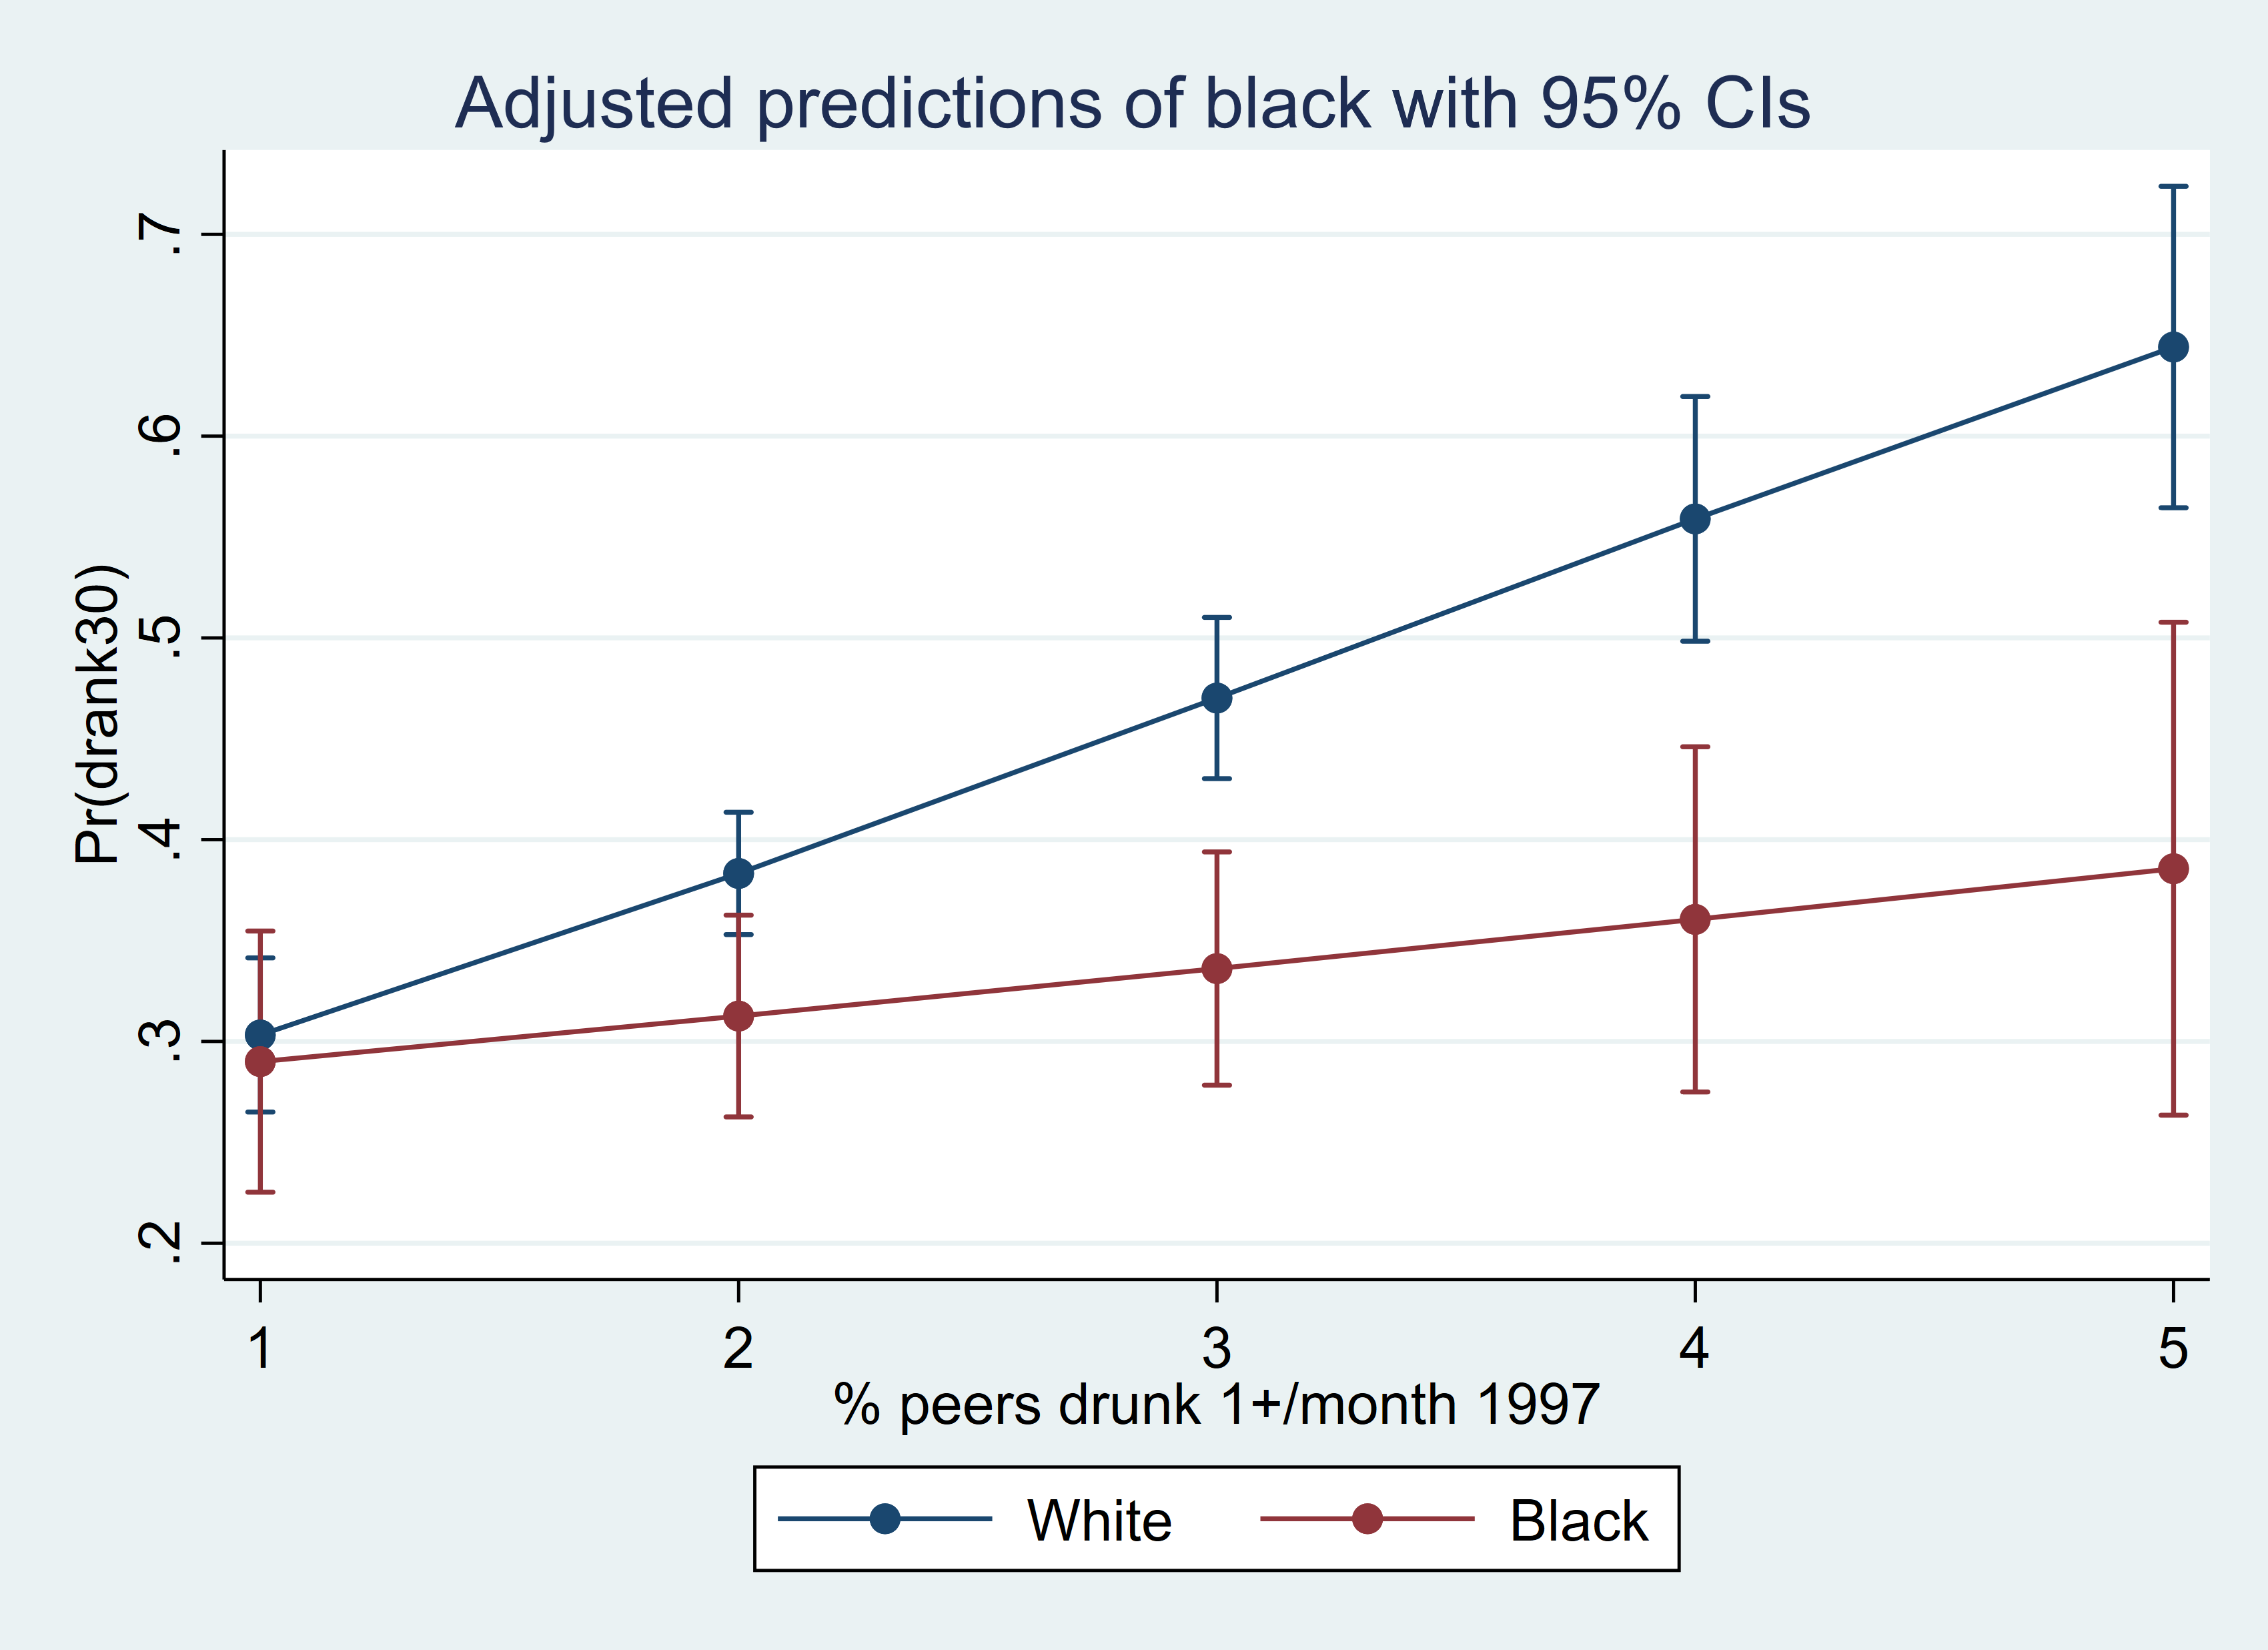

We see the odds for drinking in the last 30 days increases a greater rate for white people as number of peers who drink increases. The interaction term is also statistically significant.

## Practice: Logistic regression
* Q1: Open the nhanes2 dataset: https://www.stata-press.com/data/r17/nhanes2.dta
* Q2: Use codebook command on diabetes and region
* Q3: Write a logistic regression equation with diabetes as the dependent variable. Independent variables are age, rural, and region (with west as the reference category).
* Q4: Estimate the equation with Stata
* Q5: Use margins command to get the predicted probabilities of diabetes across regions holding other variables at the mean.

<i> answers at the bottom of workbook</i>

# answers below

<b>Interactions between a categorical and numeric variables.</b>

In [9]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear

In [10]:
regress bmi i.rural i.female##c.age


      Source |       SS           df       MS      Number of obs   =    10,351
-------------+----------------------------------   F(4, 10346)     =     96.62
       Model |  9003.71326         4  2250.92831   Prob > F        =    0.0000
    Residual |  241020.449    10,346  23.2960032   R-squared       =    0.0360
-------------+----------------------------------   Adj R-squared   =    0.0356
       Total |  250024.162    10,350  24.1569239   Root MSE        =    4.8266

------------------------------------------------------------------------------
         bmi | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       rural |
      Rural  |   .2123749   .0986402     2.15   0.031     .0190211    .4057287
             |
      female |
     Female  |  -2.116887   .2792419    -7.58   0.000    -2.664255   -1.569519
         age |   .0245371    .004016     6.11   0.000     .0166651    .0324092
     

<center>$(bmi_i)=\beta_0+\beta_1*(rural_i)+\beta_2*(female_i)+\beta_3*(age_i)+\beta_4*(femaleXage_i)$
    
<center>$(bmi_i)=24.265+0.212*(rural_i)-2.117*(female_i)+0.0245*(age_i)+0.045*(femaleXage_i)$
    
<b> female =1

<center>$(bmi_i)=24.265+0.212*(rural_i)-2.117*(1)+0.0245*(age_i)+0.045*(1Xage_i)$
<center>$(bmi_i)=22.148+0.212*(rural_i)-2.117*(1)+0.0695*(age_i)$    
    
<b> female=0
    
<center>$(bmi_i)=24.265+0.212*(rural_i)-2.117*(0)+0.0245*(age_i)+0.045*(0Xage_i)$
<center>$(bmi_i)=22.148+0.212*(rural_i)+0.0245*(age_i)$    

In [11]:
summ age


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         age |     10,351    47.57965    17.21483         20         74


In [12]:
margins female, at (age=(20(5)75))
marginsplot
graph export "marginsplot_bmi_female_age.png", replace width(3400)



Predictive margins                                      Number of obs = 10,351
Model VCE: OLS

Expression: Linear prediction, predict()
1._at:  age = 20
2._at:  age = 25
3._at:  age = 30
4._at:  age = 35
5._at:  age = 40
6._at:  age = 45
7._at:  age = 50
8._at:  age = 55
9._at:  age = 60
10._at: age = 65
11._at: age = 70
12._at: age = 75

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
  _at#female |
     1#Male  |   24.83337   .1298158   191.30   0.000      24.5789    25.08783
   1#Female  |   23.62563    .123963   190.59   0.000     23.38264    23.86862
     2#Male  |   24.95605   .1132964   220.27   0.000     24.73397    25.17814
   2#Female  |   23.97561   .1083147   221.35   0.000     23.76329    24.18792
     3#Male  |   25.07874   .0981142   255.61   0.

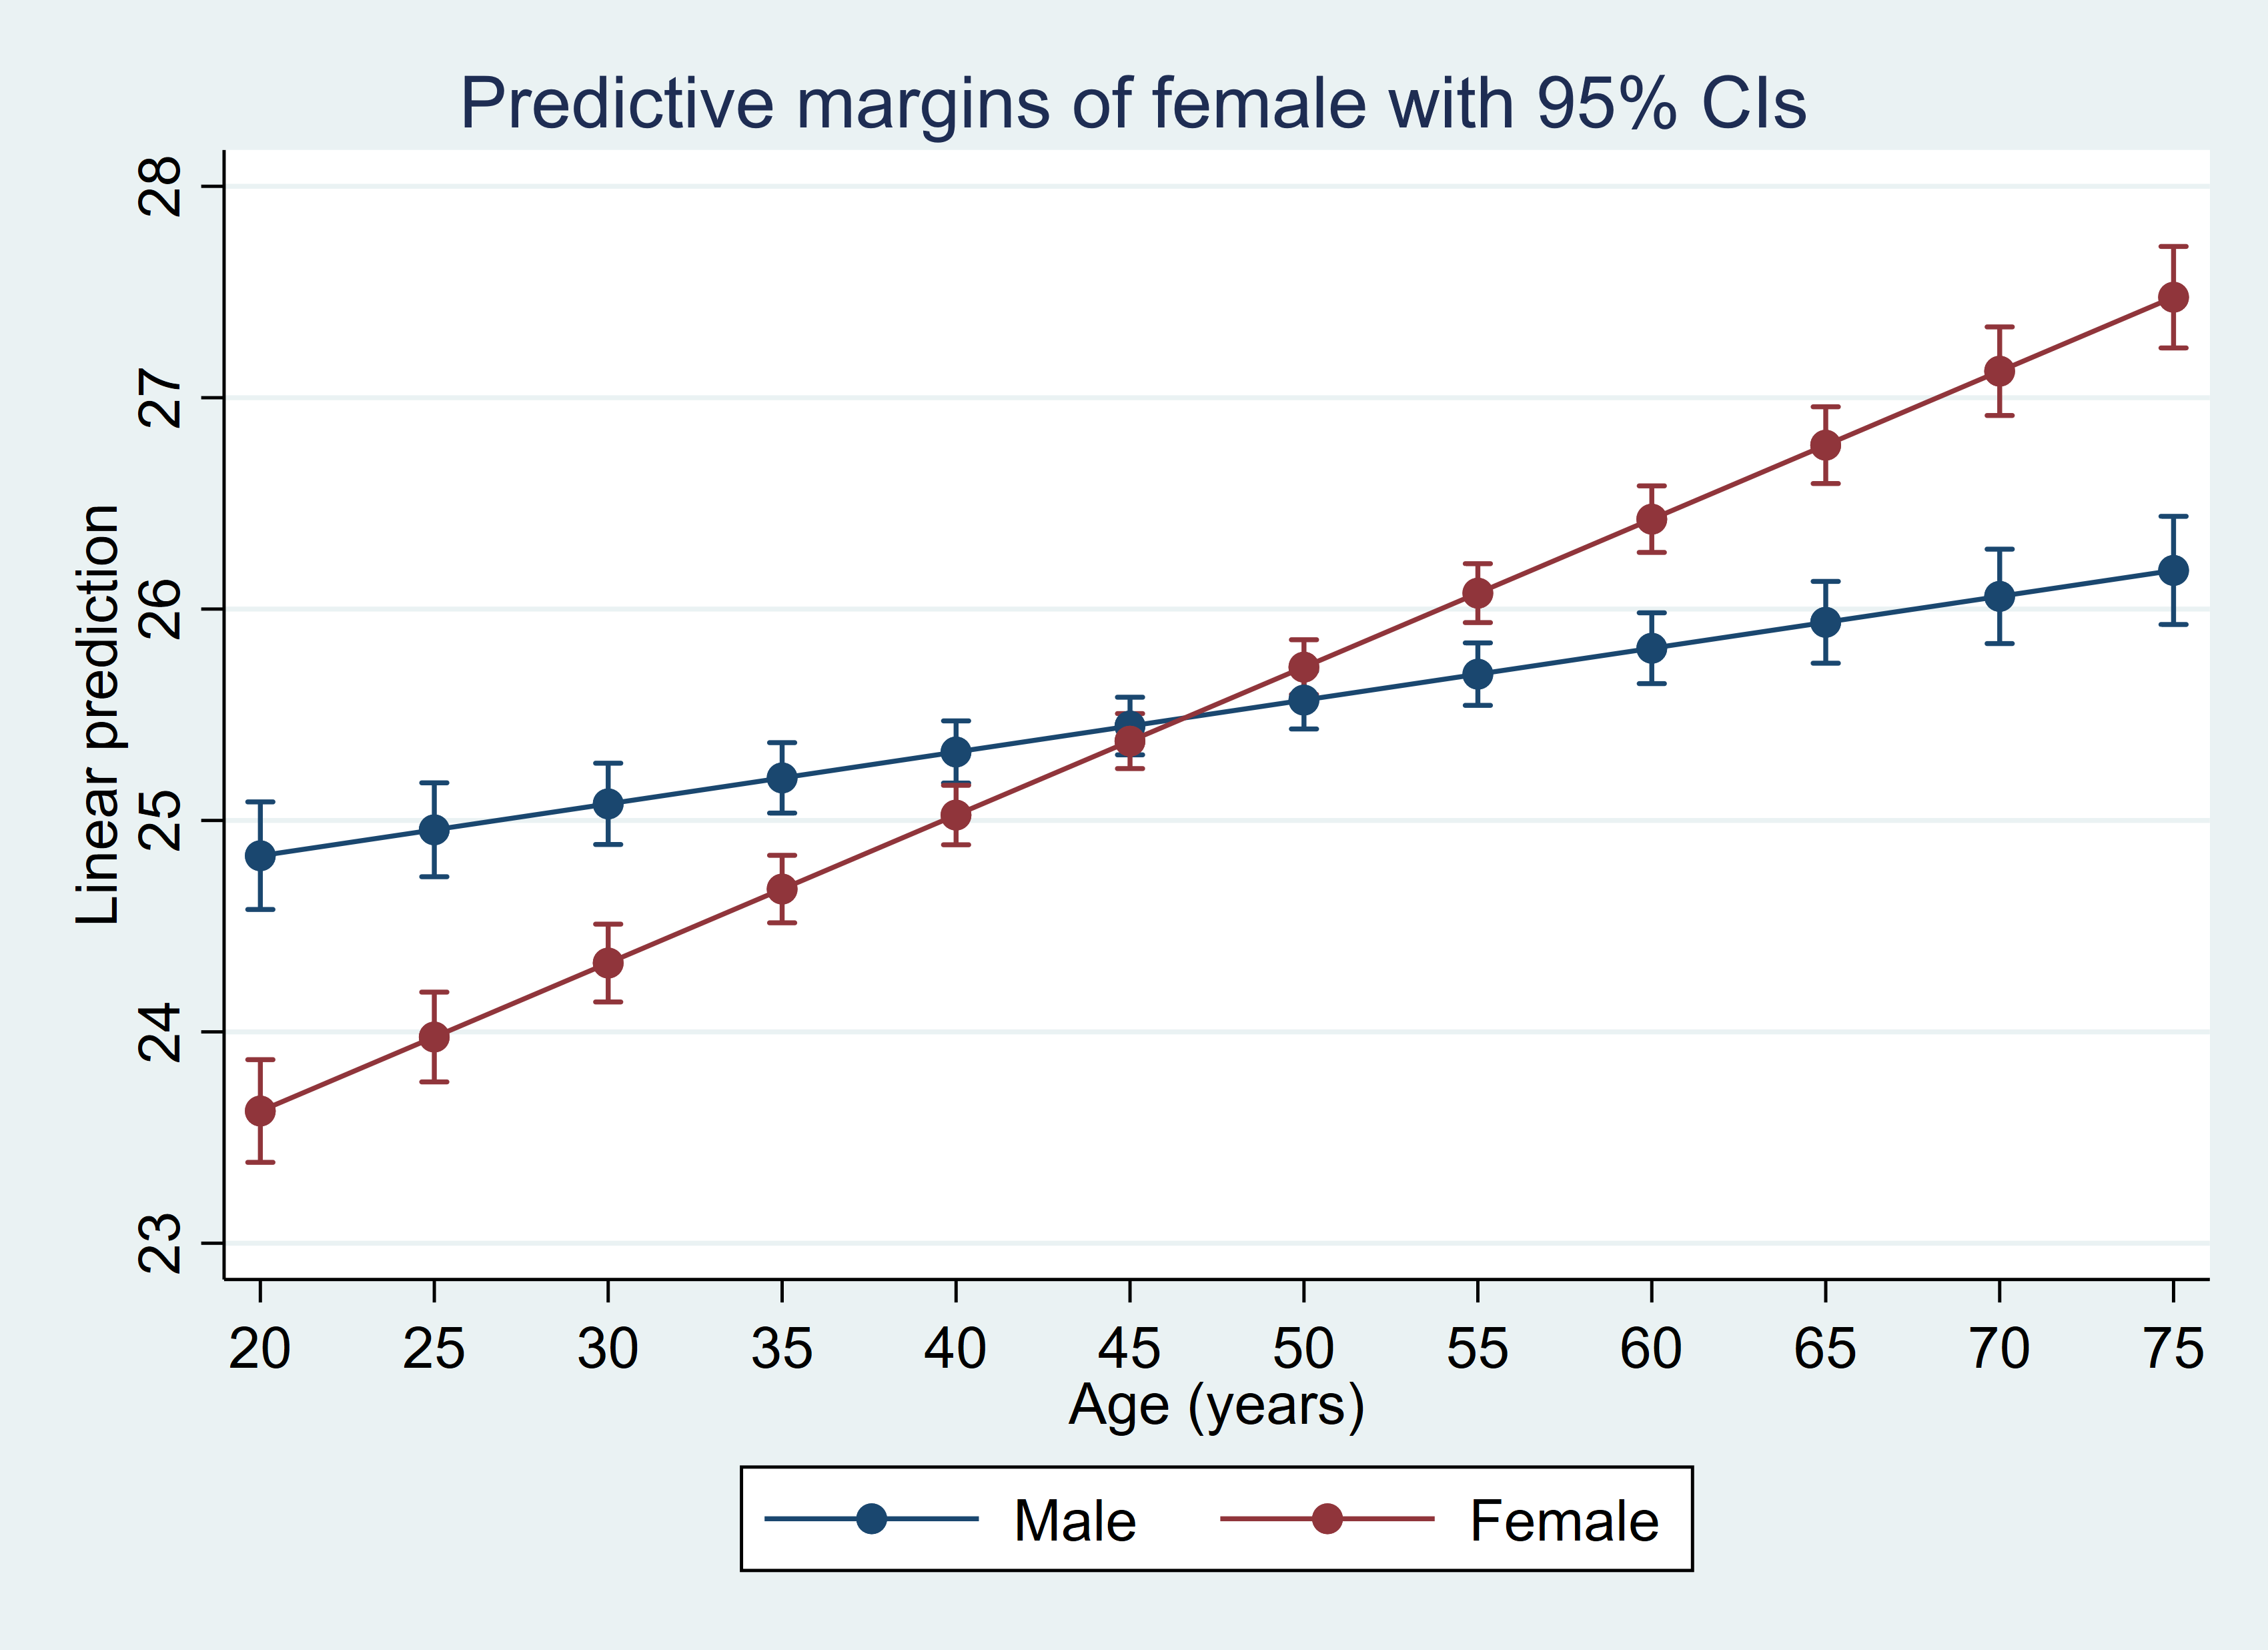

There is a statistically significance age effect on gender for body mass index, where age has a stronger effect on women's BMI as compared to men.

<b>Interactions between two numeric variables.</b>

In [13]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear

In [14]:
codebook tcresult


--------------------------------------------------------------------------------
tcresult                                               Serum cholesterol (mg/dL)
--------------------------------------------------------------------------------

                  Type: Numeric (int)

                 Range: [80,828]                      Units: 1
         Unique values: 316                       Missing .: 0/10,351

                  Mean:  217.67
             Std. dev.: 49.3869

           Percentiles:     10%       25%       50%       75%       90%
                            160       183       213       247       282


In [15]:
regress bmi c.tcresult i.female c.age


      Source |       SS           df       MS      Number of obs   =    10,351
-------------+----------------------------------   F(3, 10347)     =    150.01
       Model |  10420.9799         3  3473.65996   Prob > F        =    0.0000
    Residual |  239603.182    10,347   23.156778   R-squared       =    0.0417
-------------+----------------------------------   Adj R-squared   =    0.0414
       Total |  250024.162    10,350  24.1569239   Root MSE        =    4.8121

------------------------------------------------------------------------------
         bmi | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    tcresult |   .0121047   .0010479    11.55   0.000     .0100506    .0141587
             |
      female |
     Female  |  -.0614953    .095112    -0.65   0.518    -.2479331    .1249425
         age |   .0351012   .0029951    11.72   0.000     .0292303     .040972
       _cons |   21.

In [16]:
regress bmi i.female c.age##c.tcresult


      Source |       SS           df       MS      Number of obs   =    10,351
-------------+----------------------------------   F(4, 10346)     =    134.07
       Model |  12320.9975         4  3080.24938   Prob > F        =    0.0000
    Residual |  237703.165    10,346  22.9753687   R-squared       =    0.0493
-------------+----------------------------------   Adj R-squared   =    0.0489
       Total |  250024.162    10,350  24.1569239   Root MSE        =    4.7933

------------------------------------------------------------------------------
         bmi | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      female |
     Female  |   .0348939   .0953298     0.37   0.714    -.1519709    .2217587
         age |   .1496168   .0129412    11.56   0.000     .1242495     .174984
    tcresult |   .0392758   .0031649    12.41   0.000      .033072    .0454797
             |
       c.age#|
  c.t

In [17]:
summ age tcresult


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         age |     10,351    47.57965    17.21483         20         74
    tcresult |     10,351    217.6697    49.38694         80        828


In [18]:
margins , at(age=(20(25)75) tcresult=(80(100)830)) atmeans vsquish


Adjusted predictions                                    Number of obs = 10,351
Model VCE: OLS

Expression: Linear prediction, predict()
1._at:  0.female = .4748333 (mean)
        1.female = .5251667 (mean)
        age      =       20
        tcresult =       80
2._at:  0.female = .4748333 (mean)
        1.female = .5251667 (mean)
        age      =       20
        tcresult =      180
3._at:  0.female = .4748333 (mean)
        1.female = .5251667 (mean)
        age      =       20
        tcresult =      280
4._at:  0.female = .4748333 (mean)
        1.female = .5251667 (mean)
        age      =       20
        tcresult =      380
5._at:  0.female = .4748333 (mean)
        1.female = .5251667 (mean)
        age      =       20
        tcresult =      480
6._at:  0.female = .4748333 (mean)
        1.female = .5251667 (mean)
        age      =       20
        tcresult =      580
7._at:  0.female = .4748333 (mean)
        1.female = .5251667 (mean)
        age      =       20
        t

In [19]:
marginsplot, x(age)
graph export "tcresults_age.png", replace width(3400)



Variables that uniquely identify margins: age tcresult

file C:/Users/acade/.stata_kernel_cache/graph3.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph3.pdf saved as PDF format

(file tcresults_age.png not found)
file tcresults_age.png saved as PNG format


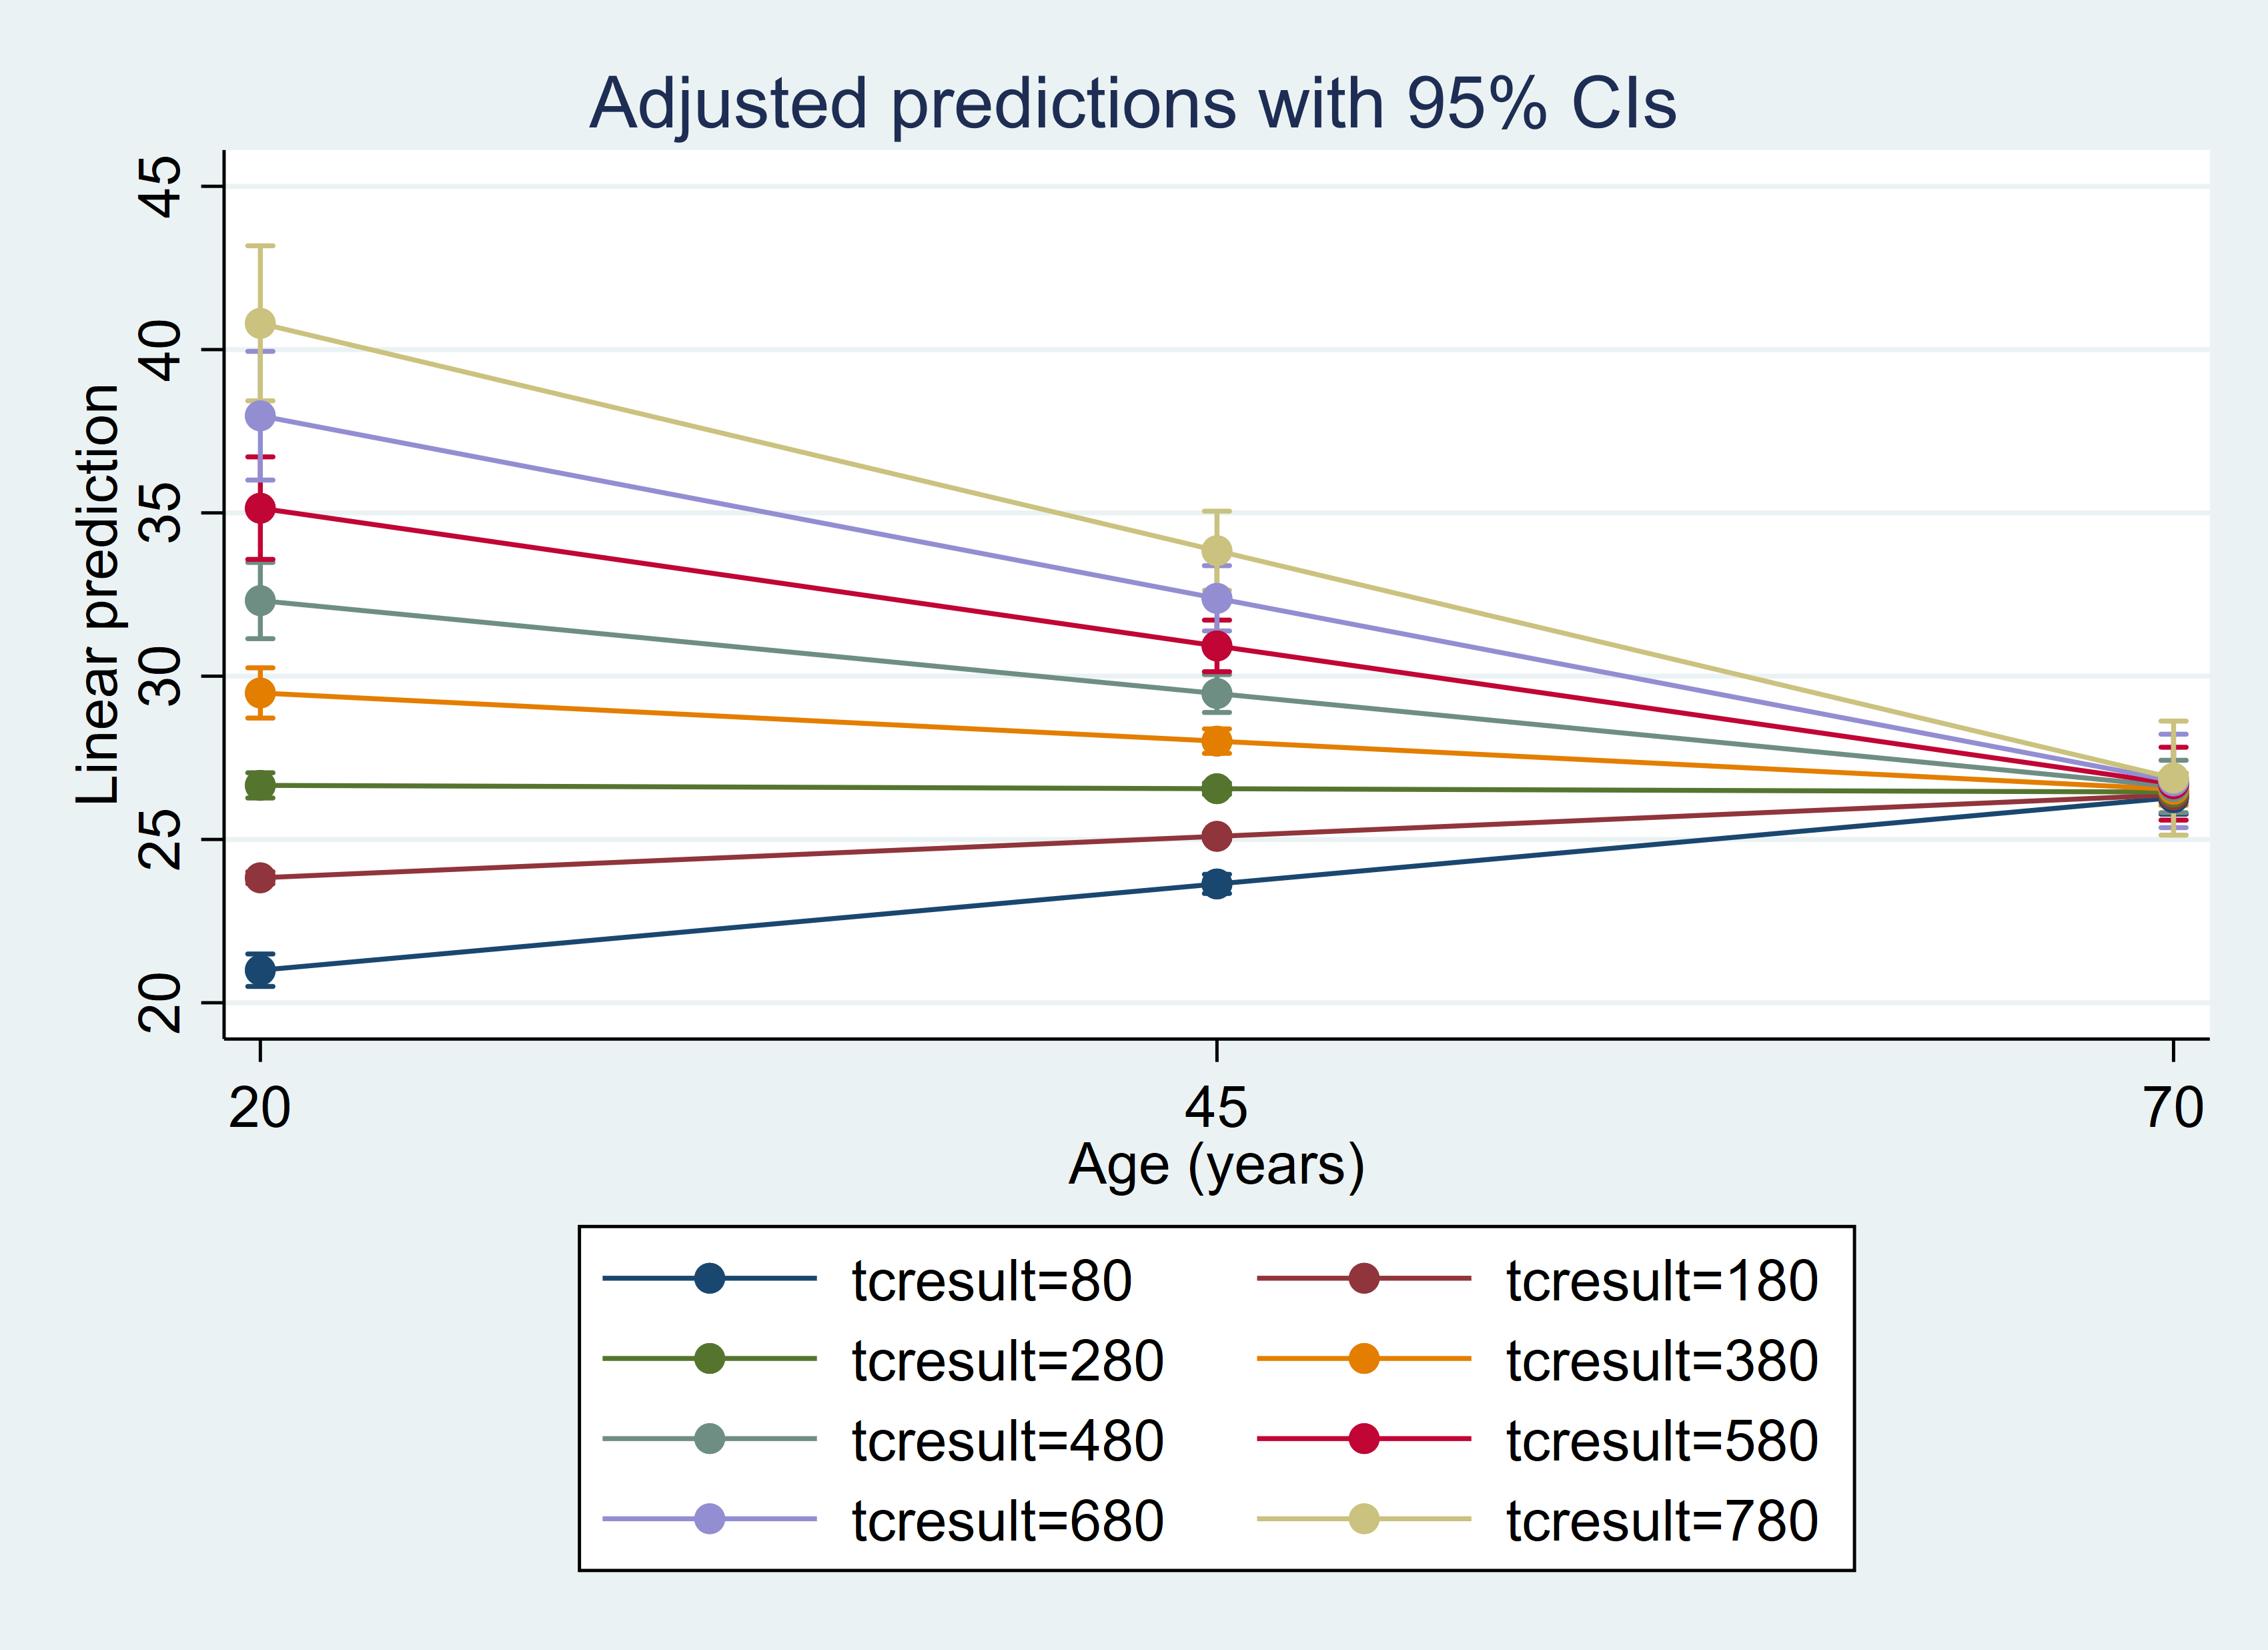

There is a statistically significance interaction between cholesterol and age on body mass index. The graph demonstrates that the effect of age on BMI gets steeper as cholesterol increases. 

<b> logistic regression practice</b>

In [56]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear
codebook diabetes region




--------------------------------------------------------------------------------
diabetes                                                         Diabetes status
--------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: diabetes

                 Range: [0,1]                         Units: 1
         Unique values: 2                         Missing .: 2/10,351

            Tabulation: Freq.   Numeric  Label
                        9,850         0  Not diabetic
                          499         1  Diabetic
                            2         .  

--------------------------------------------------------------------------------
region                                                                    Region
--------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: region

                 Range: [1,4]        

<center>$Pr(diabetes_i=1)=F(\beta_0+\beta_1*(age_i)+\beta_2*(rural_i)+\beta_3*(northeast_i)+\beta_4*(mountainwest_i)+\beta_4*(south_i))$
    
<center>$ where $
    <center> $ F(z) = e^{z} / (1+ e^{z}) $

In [57]:
logistic diabetes age i.rural ib4.region


Logistic regression                                     Number of obs = 10,349
                                                        LR chi2(5)    = 348.59
                                                        Prob > chi2   = 0.0000
Log likelihood = -1825.4636                             Pseudo R2     = 0.0872

------------------------------------------------------------------------------
    diabetes | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   1.060833   .0039663    15.79   0.000     1.053088    1.068635
             |
       rural |
      Rural  |    .925828   .0902857    -0.79   0.429     .7647545    1.120827
             |
      region |
         NE  |    1.09309   .1567141     0.62   0.535     .8253171    1.447741
         MW  |   1.108054   .1489206     0.76   0.445     .8514534    1.441986
          S  |   1.341341   .1710474     2.30   0.021     1.044707   

The odd ratios of having diabetes are multiplied by 1.06 for every one year increase to age. In other words, for every one year increase in age, there is a 6% significant increase in odds of diabetes. The odd ratios of having diabetes for rural residents are 0.93 as compared to non-rural residents however it is not significant. In other words, the odds for having diabetes for people residing in rural areas is 7% less as compared to those residing in non-rural areas. People living in the northeast are estimated to have 9% nonsignificant increase in odds in diabetes as compared to those living in the west region. Those residing in the mountain west have a 11% nonsignificant increase in odds in diabetes as compared to the west region. Southern residents have a significantly higher odds of having diabetes as compared to western residents.

In [58]:
margins region, atmeans


Adjusted predictions                                    Number of obs = 10,349
Model VCE: OIM

Expression: Pr(diabetes), predict()
At: age      =  47.5818 (mean)
    0.rural  = .6326215 (mean)
    1.rural  = .3673785 (mean)
    1.region =  .202435 (mean)
    2.region = .2679486 (mean)
    3.region = .2756788 (mean)
    4.region = .2539376 (mean)

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
      region |
         NE  |   .0311291   .0034867     8.93   0.000     .0242954    .0379629
         MW  |   .0315418   .0031714     9.95   0.000     .0253261    .0377576
          S  |   .0379307   .0034768    10.91   0.000     .0311164     .044745
          W  |   .0285538   .0030197     9.46   0.000     .0226353    .0344723
-------------------------------------------

In [59]:
marginsplot
graph export "region_diabetes.png", replace width(3400)



Variables that uniquely identify margins: region

file C:/Users/acade/.stata_kernel_cache/graph9.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph9.pdf saved as PDF format

(file region_diabetes.png not found)
file region_diabetes.png saved as PNG format


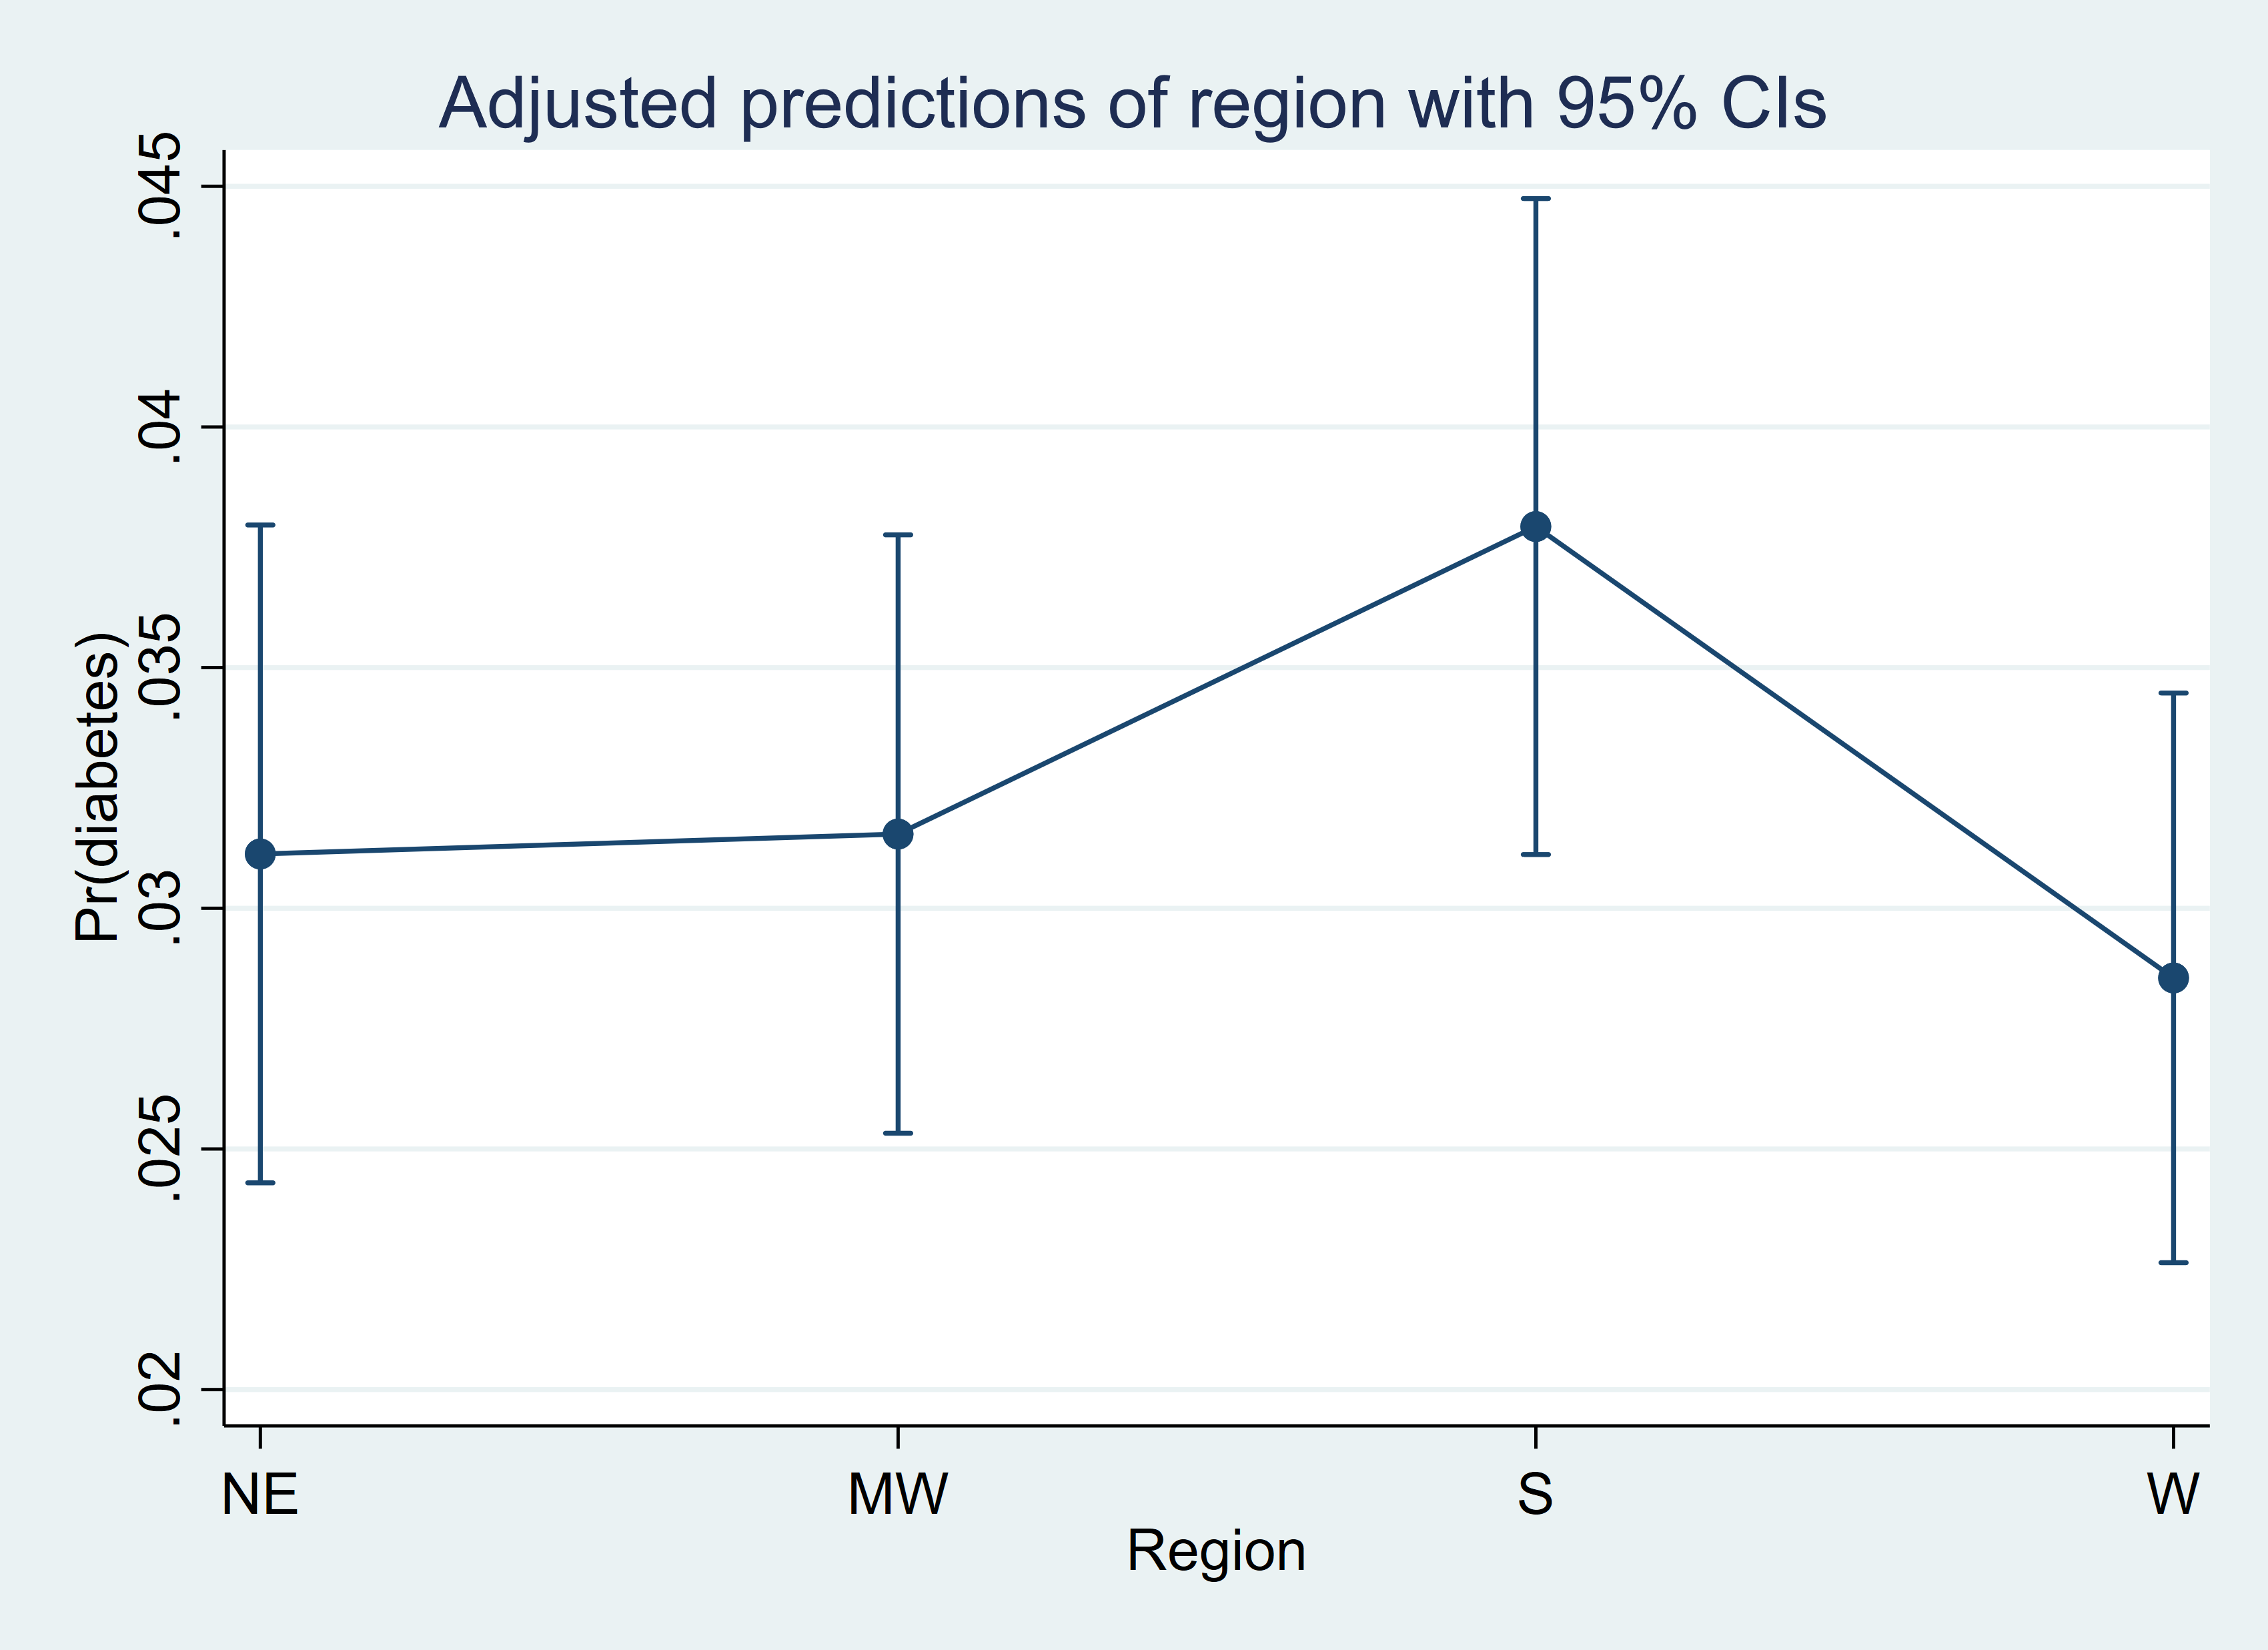

These are predicted probabilities. 